**Predicting House Prices in Ames, Iowa -- Group 26 -- Jay Cherukuri and Divya Gandhi**

### Google Drive Mounting Code (for Use with Google Colabs)

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Importing Packages 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR

from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

### Importing Files

In [0]:
#ames_train=pd.read_csv('gdrive/My Drive/Machine Learning Project/train.csv')
#ames_test=pd.read_csv('gdrive/My Drive/Machine Learning Project/test.csv')

ames_train=pd.read_csv('train.csv')
ames_test=pd.read_csv('test.csv')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

## Data Exploration

### Basic Statistics and Data Types

#### Training Set

In [0]:
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
ames_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


####Testing Set

In [0]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [0]:
ames_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Cleaning the Training Set

### Missing/Null Values?

In [0]:
print(ames_train.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Dropping Columns with Significant Missing Data

In [0]:
ames_train = ames_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage','GarageYrBlt'],axis = 1)

#### Dealing with Smaller Amounts of Missing Values

##### MasVnr

In [0]:
tempames_train = ames_train[['Id', 'MasVnrType', 'MasVnrArea']]
nans = lambda tempames_train: tempames_train[tempames_train.isnull().any(axis=1)]
nans(tempames_train)

,Id,MasVnrType,MasVnrArea
234,235,NaN,NaN
529,530,NaN,NaN
650,651,NaN,NaN
936,937,NaN,NaN
973,974,NaN,NaN
977,978,NaN,NaN
1243,1244,NaN,NaN
1278,1279,NaN,NaN


Given that each corresonding row is null for these two null columns, none is filled in for type and 0 for area (no MasVrn)

In [0]:
ames_train[['MasVnrType']] = ames_train[['MasVnrType']].fillna('None')
ames_train[['MasVnrArea']] = ames_train[['MasVnrArea']].fillna(0)

##### Electrical

In [0]:
tempames_train = ames_train[['Id', 'Electrical']]
nans = lambda tempames_train: tempames_train[tempames_train.isnull().any(axis=1)]
nans(tempames_train)

,Id,Electrical
1379,1380,NaN


Id 1380 has a null value for the electrical system.  This represents a data error.  The most frequently occuring electrical system is filled in for that value.

In [0]:
ames_train.loc[1379, 'Electrical'] = 'SBrkr'

##### Basement Features

In [0]:
tempames_train = ames_train[['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
nans = lambda tempames_train: tempames_train[tempames_train.isnull().any(axis=1)]
nans(tempames_train)

,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,18,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,40,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,91,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,103,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,157,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,183,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,260,NaN,NaN,NaN,NaN,0,NaN,0,0,0
332,333,Gd,TA,No,GLQ,1124,NaN,479,1603,3206
342,343,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,363,NaN,NaN,NaN,NaN,0,NaN,0,0,0


Id 333 has a null value for BsmtFinType2 despite having SF listed.  This is a data error.  We will fill that cell in with the most frequently occuring element (Unf.)

In [0]:
ames_train.loc[332, 'BsmtFinType2'] = 'Unf'

Id 948 has a null value for BsmtExposure despite having some square footage.  This is a data error.  We will fill that cell in with no exposure. 

In [0]:
ames_train.loc[948, 'BsmtExposure'] = 'No'

The other null values correspond to those houses that didn't have a basement.  We will fill that in with values that correspond to no basement.  

In [0]:
ames_train['BsmtFinType1'] = ames_train['BsmtFinType1'].fillna('NA')
ames_train['BsmtFinType2'] = ames_train['BsmtFinType2'].fillna('NA')
ames_train['BsmtExposure'] = ames_train['BsmtExposure'].fillna('NA')
ames_train['BsmtQual'] = ames_train['BsmtQual'].fillna('NA')
ames_train['BsmtCond'] = ames_train['BsmtCond'].fillna('NA')

##### Garage Features

In [0]:
tempames_train = ames_train[['Id', 'GarageType', 'GarageArea', 'GarageCond', 'GarageQual']]
nans = lambda tempames_train: tempames_train[tempames_train.isnull().any(axis=1)]
nans(tempames_train)

,Id,GarageType,GarageArea,GarageCond,GarageQual
39,40,NaN,0,NaN,NaN
48,49,NaN,0,NaN,NaN
78,79,NaN,0,NaN,NaN
88,89,NaN,0,NaN,NaN
89,90,NaN,0,NaN,NaN
99,100,NaN,0,NaN,NaN
108,109,NaN,0,NaN,NaN
125,126,NaN,0,NaN,NaN
127,128,NaN,0,NaN,NaN
140,141,NaN,0,NaN,NaN


The other null values correspond to those houses that didn't have a basement.  We will fill that in with values that correspond to no basement.  

In [0]:
ames_train['GarageType'] = ames_train['GarageType'].fillna('NA')
ames_train['GarageCond'] = ames_train['GarageCond'].fillna('NA')
ames_train['GarageQual'] = ames_train['GarageQual'].fillna('NA')
ames_train['GarageFinish'] = ames_train['GarageFinish'].fillna('NA')

### Other Data Errors

##### Exterior2nd

In [0]:
print(ames_train['Exterior2nd'].value_counts())

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


There are several columns with misspelled tags.  CmentBd should be CemntBd.  Wd Shng should be WdShing.  Brk Cmn should be BrkComm.

In [0]:
ames_train['Exterior2nd'] = ames_train['Exterior2nd'].replace('Brk Cmn', 'BrkComm').replace('CmentBd', 'CemntBd').replace('Wd Shng', 'WdShing')

### Encoding Categorical Variables

In [0]:
# Ideally, the label encoder would be used for features in which there is little meaning.  However, when it comes time to make the accompanying changes to the testing set for prediction, the label encoder may encode the variables ina different way, throwing off accuracy.  Mapping the values in the only real choice.  
#e = preprocessing.LabelEncoder()
#ames_train['MSSubClass'] = e.fit_transform(ames_train.MSSubClass.values)
#ames_train['MSZoning'] = e.fit_transform(ames_train.MSZoning.values)
#ames_train['Street'] = e.fit_transform(ames_train.Street.values)
#ames_train['Utilities'] = e.fit_transform(ames_train.Utilities.values)
#ames_train['LotConfig'] = e.fit_transform(ames_train.LotConfig.values)
#ames_train['Neighborhood'] = e.fit_transform(ames_train.Neighborhood.values)
#ames_train['Condition1'] = e.fit_transform(ames_train.Condition1.values)
#ames_train['Condition2'] = e.fit_transform(ames_train.Condition2.values)
#ames_train['HouseStyle'] = e.fit_transform(ames_train.HouseStyle.values)
#ames_train['RoofStyle'] = e.fit_transform(ames_train.RoofStyle.values)
#ames_train['RoofMatl'] = e.fit_transform(ames_train.RoofMatl.values)
#ames_train['Exterior1st'] = e.fit_transform(ames_train.Exterior1st.values)
#ames_train['Exterior2nd'] = e.fit_transform(ames_train.Exterior2nd.values)
#ames_train['MasVnrType'] = e.fit_transform(ames_train.MasVnrType.values)
#ames_train['Foundation'] = e.fit_transform(ames_train.Foundation.values)
#ames_train['Heating'] = e.fit_transform(ames_train.Heating.values)
#ames_train['Electrical'] = e.fit_transform(ames_train.Electrical.values)
#ames_train['Functional'] = e.fit_transform(ames_train.Functional.values)
#ames_train['SaleType'] = e.fit_transform(ames_train.SaleType.values)
#ames_train['SaleCondition'] = e.fit_transform(ames_train.SaleCondition.values)
#ames_train['LandContour'] = e.fit_transform(ames_train.LandContour.values)
#ames_train['BldgType'] = e.fit_transform(ames_train.BldgType.values)

#### Mapping Variables Without Meaning to their Order

In [0]:
ames_train['MSZoning'] = ames_train['MSZoning'].replace('A', 0).replace('C (all)', 1).replace('FV', 2).replace('I', 3).replace('RH', 4).replace('RL', 5).replace('RP', 6).replace('RM', 7)
ames_train['Street'] = ames_train['Street'].replace('Grvl', 0).replace('Pave', 1)
ames_train['Utilities'] = ames_train['Utilities'].replace('AllPub', 3).replace('NoSewr', 2).replace('NoSeWa', 1).replace('ELO', 0)
ames_train['LotConfig'] = ames_train['LotConfig'].replace('Inside', 0).replace('Corner', 1).replace('CulDSac', 2).replace('FR2', 3).replace('FR3', 4)
ames_train['Neighborhood'] = ames_train['Neighborhood'].replace('Blmngtn',0).replace('Blueste',1).replace('BrDale',2).replace('BrkSide',3).replace('ClearCr',4).replace('CollgCr',5).replace('Crawfor',6).replace('Edwards',7).replace('Gilbert',8).replace('IDOTRR',9).replace('MeadowV',10).replace('Mitchel',11).replace('Names',12).replace('NAmes',12).replace('NoRidge',13).replace('NPkVill',14).replace('NridgHt',15).replace('NWAmes',16).replace('OldTown',17).replace('SWISU',18).replace('Sawyer',19).replace('SawyerW',20).replace('Somerst',21).replace('StoneBr',22).replace('Timber',23).replace('Veenker',24)
ames_train['Condition1'] = ames_train['Condition1'].replace('Artery', 0).replace('Feedr', 1).replace('Norm', 2).replace('RRNn', 3).replace('RRAn', 4).replace('PosN', 5).replace('PosA', 6).replace('RRNe', 7).replace('RRAe', 8)
ames_train['Condition2'] = ames_train['Condition2'].replace('Artery', 0).replace('Feedr', 1).replace('Norm', 2).replace('RRNn', 3).replace('RRAn', 4).replace('PosN', 5).replace('PosA', 6).replace('RRNe', 7).replace('RRAe', 8)
ames_train['HouseStyle'] = ames_train['HouseStyle'].replace('1Story', 0).replace('1.5Fin', 1).replace('1.5Unf', 2).replace('2Story', 3).replace('2.5Fin', 4).replace('2.5Unf', 5).replace('SFoyer', 6).replace('SLvl', 7)
ames_train['RoofStyle'] = ames_train['RoofStyle'].replace('Flat', 0).replace('Gable', 1).replace('Gambrel', 2).replace('Hip', 3).replace('Mansard', 4).replace('Shed', 5)
ames_train['RoofMatl'] = ames_train['RoofMatl'].replace('ClyTile', 0).replace('CompShg', 1).replace('Membran', 2).replace('Metal', 3).replace('Roll', 4).replace('Tar&Grv', 5).replace('WdShake', 6).replace('WdShngl', 7)
ames_train['Exterior1st'] = ames_train['Exterior1st'].replace('AsbShng', 0).replace('AsphShn', 1).replace('BrkComm', 2).replace('BrkFace', 3).replace('CBlock', 4).replace('CemntBd', 5).replace('HdBoard', 6).replace('ImStucc', 7).replace('MetalSd', 8).replace('Other', 9).replace('Plywood', 10).replace('PreCast', 11).replace('Stone', 12).replace('Stucco', 13).replace('VinylSd', 14).replace('Wd Sdng', 15).replace('WdShing', 16)
ames_train['Exterior2nd'] = ames_train['Exterior2nd'].replace('AsbShng', 0).replace('AsphShn', 1).replace('BrkComm', 2).replace('BrkFace', 3).replace('CBlock', 4).replace('CemntBd', 5).replace('HdBoard', 6).replace('ImStucc', 7).replace('MetalSd', 8).replace('Other', 9).replace('Plywood', 10).replace('PreCast', 11).replace('Stone', 12).replace('Stucco', 13).replace('VinylSd', 14).replace('Wd Sdng', 15).replace('WdShing', 16)
ames_train['MasVnrType'] = ames_train['MasVnrType'].replace('BrkCmn', 1).replace('BrkFace', 2).replace('CBlock', 3).replace('None', 0).replace('Stone', 4)
ames_train['Foundation'] = ames_train['Foundation'].replace('BrkTil', 0).replace('CBlock', 1).replace('PConc', 2).replace('Slab', 3).replace('Stone', 4).replace('Wood', 5)
ames_train['Heating'] = ames_train['Heating'].replace('Floor', 0).replace('GasA', 1).replace('GasW', 2).replace('Grav', 3).replace('OthW', 4).replace('Wall', 5)
ames_train['Electrical'] = ames_train['Electrical'].replace('SBrkr', 0).replace('FuseA', 1).replace('FuseF', 2).replace('FuseP', 3).replace('Mix', 4)
ames_train['Functional'] = ames_train['Functional'].replace('Typ', 7).replace('Min1', 6).replace('Min2', 5).replace('Mod', 4).replace('Maj1', 3).replace('Maj2', 2).replace('Sev', 1).replace('Sal', 0)
ames_train['SaleType'] = ames_train['SaleType'].replace('WD', 0).replace('CWD', 1).replace('VWD', 2).replace('New', 3).replace('COD', 4).replace('Con', 5).replace('ConLw', 6).replace('ConLI', 7).replace('ConLD', 8).replace('Oth', 9)
ames_train['SaleCondition'] = ames_train['SaleCondition'].replace('Normal', 0).replace('Abnorml', 1).replace('AdjLand', 2).replace('Alloca', 3).replace('Family', 4).replace('Partial', 5)
ames_train['LandContour'] = ames_train['LandContour'].replace('Lvl', 0).replace('Bnk', 1).replace('HLS', 2).replace('Low', 3)
ames_train['BldgType'] = ames_train['BldgType'].replace('1Fam', 0).replace('2fmCon', 1).replace('Duplex', 2).replace('TwnhsE', 3).replace('Twnhs', 4)

#### Mapping Variables With Meaning to their Order

In [0]:
ames_train['LotShape'] = ames_train['LotShape'].replace('Reg', 0).replace('IR1', 1).replace('IR2', 2).replace('IR3', 3)
ames_train['LandSlope'] = ames_train['LandSlope'].replace('Gtl', 0).replace('Mod', 1).replace('Sev', 2)
ames_train['ExterQual'] = ames_train['ExterQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['ExterCond'] = ames_train['ExterCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['BsmtQual'] = ames_train['BsmtQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['BsmtCond'] = ames_train['BsmtCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['HeatingQC'] = ames_train['HeatingQC'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['KitchenQual'] = ames_train['KitchenQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['GarageQual'] = ames_train['GarageQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['GarageCond'] = ames_train['GarageCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_train['BsmtExposure'] = ames_train['BsmtExposure'].replace('Gd', 4).replace('Av', 3).replace('Mn', 2).replace('No', 1).replace('NA', 0)
ames_train['BsmtFinType1'] = ames_train['BsmtFinType1'].replace('NA', 0).replace('Unf', 1).replace('LwQ', 2).replace('Rec', 3).replace('BLQ', 4).replace('ALQ', 5).replace('GLQ', 6)
ames_train['BsmtFinType2'] = ames_train['BsmtFinType2'].replace('NA', 0).replace('Unf', 1).replace('LwQ', 2).replace('Rec', 3).replace('BLQ', 4).replace('ALQ', 5).replace('GLQ', 6)
ames_train['CentralAir'] = ames_train['CentralAir'].replace('N', 0).replace('Y', 1)
ames_train['GarageType'] = ames_train['GarageType'].replace('NA', 0).replace('2Types', 1).replace('Attchd', 2).replace('Basment', 3).replace('BuiltIn', 4).replace('CarPort', 5).replace('Detchd', 6)
ames_train['GarageFinish'] = ames_train['GarageFinish'].replace('Fin', 3).replace('RFn', 2).replace('Unf', 1).replace('NA', 0)
ames_train['PavedDrive'] = ames_train['PavedDrive'].replace('Y', 2).replace('P', 1).replace('N', 0)

## Data Exploration Cont.

#### Sale Price Distribution

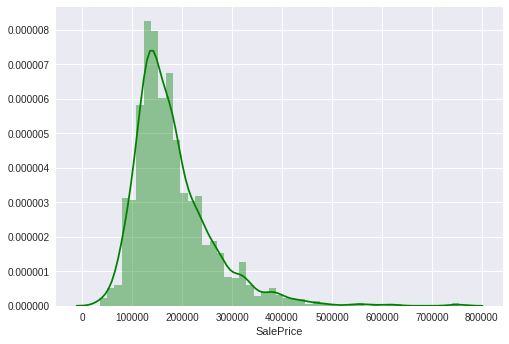

In [0]:
sns.distplot(ames_train['SalePrice'], color = 'Green')
plt.show()

#### Skew Values for SalePrice and Features

In [0]:
ames_train.skew()

Id                0.000000
MSSubClass        1.407657
MSZoning         -0.759261
LotArea          12.207688
Street          -15.518770
LotShape          1.309986
LandContour       3.466380
Utilities       -38.209946
LotConfig         1.993861
LandSlope         4.813682
Neighborhood      0.044100
Condition1        3.337171
Condition2       14.358560
BldgType          2.212998
HouseStyle        1.174988
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
RoofStyle         1.473796
RoofMatl          8.109402
Exterior1st      -0.541249
Exterior2nd      -0.570928
MasVnrType        1.013137
MasVnrArea        2.677616
ExterQual         0.825988
ExterCond         1.397219
Foundation        0.091217
BsmtQual         -1.287571
BsmtCond         -3.701033
BsmtExposure      1.105602
BsmtFinType1     -0.159177
BsmtFinSF1        1.685503
BsmtFinType2      3.302928
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
H

#### Mean and Variance

In [0]:
ames_train.describe().loc[['mean']]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
mean,730.5,56.89726,5.126712,10516.828082,0.99589,0.408219,0.185616,2.99863,0.416438,0.062329,12.24863,2.030822,2.006849,0.444521,1.562329,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,10.758904,10.867123,0.970548,103.117123,3.39589,3.083562,1.396575,3.489041,2.934932,1.630822,3.54589,443.639726,1.247945,46.549315,567.240411,1057.429452,1.036301,4.145205,0.934932,0.110274,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,6.841781,0.613014,3.09726,1.715753,1.767123,472.980137,2.810274,2.808904,1.856164,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.490411,0.582192,180921.19589


In [0]:
ames_train.var()

Id               1.777550e+05
MSSubClass       1.789338e+03
MSZoning         1.103193e+00
LotArea          9.962565e+07
Street           4.095505e-03
LotShape         3.390688e-01
LandContour      3.678533e-01
Utilities        2.739726e-03
LotConfig        5.982217e-01
LandSlope        7.630437e-02
Neighborhood     3.619105e+01
Condition1       7.714962e-01
Condition2       6.163914e-02
BldgType         1.140854e+00
HouseStyle       3.818594e+00
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
RoofStyle        6.972213e-01
RoofMatl         3.589529e-01
Exterior1st      1.670948e+01
Exterior2nd      1.591790e+01
MasVnrType       1.691387e+00
MasVnrArea       3.266383e+04
ExterQual        3.297980e-01
ExterCond        1.232388e-01
Foundation       5.218526e-01
BsmtQual         7.682143e-01
BsmtCond         3.048790e-01
BsmtExposure     1.137775e+00
BsmtFinType1     4.442718e+00
BsmtFinSF1       2.080255e+05
BsmtFinTyp

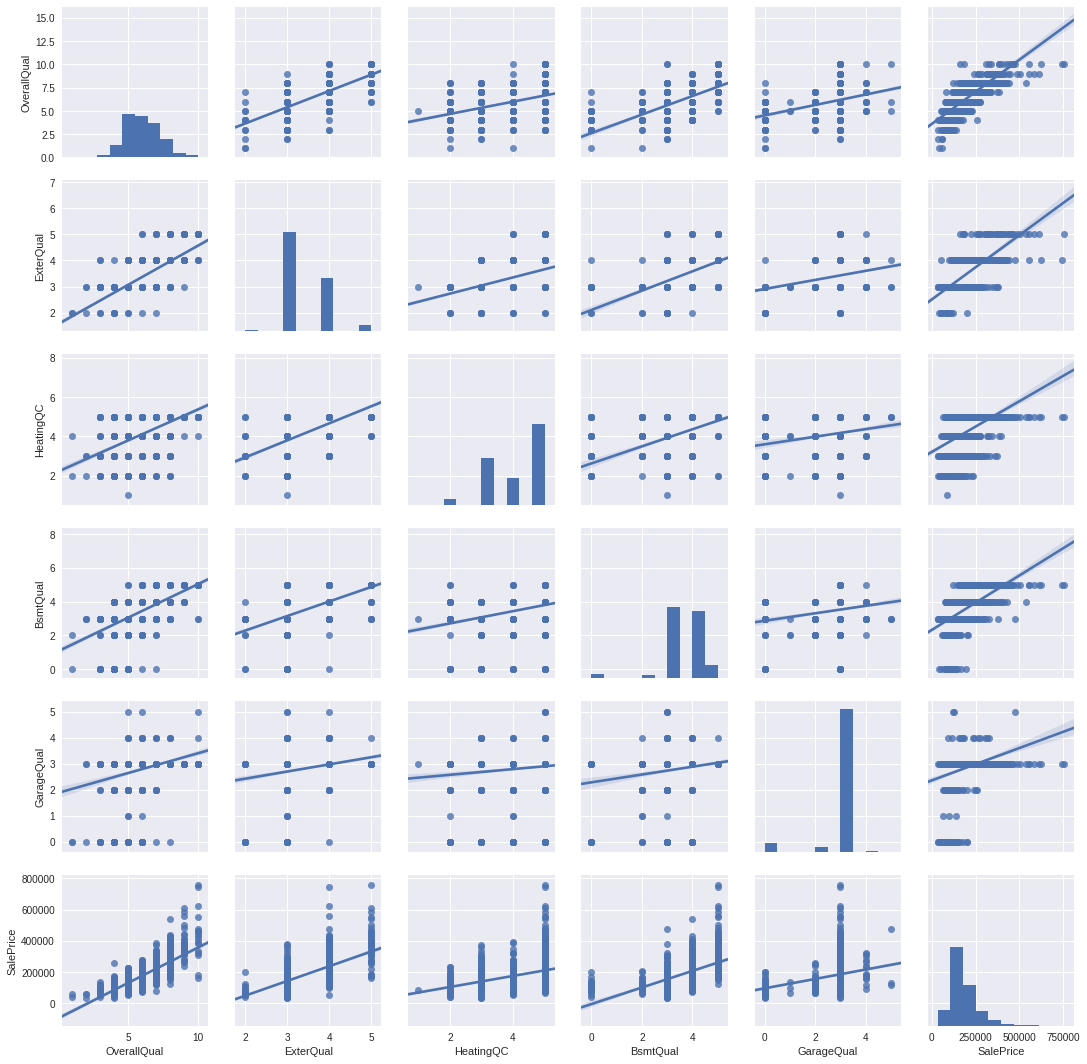

In [0]:
_ = sns.pairplot(ames_train[['OverallQual', 'ExterQual', 'HeatingQC', 'BsmtQual', 'GarageQual', 'SalePrice']], kind='reg')
plt.show()

#### Correlation

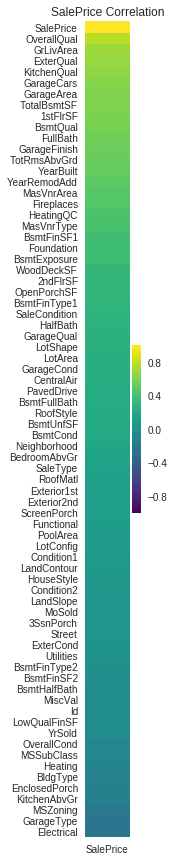

In [0]:
df = pd.DataFrame(ames_train.corr()['SalePrice'])
plt.figure(figsize=(1,15))
sns.heatmap(df.sort_values(by=['SalePrice'], ascending=False), annot=False, cmap='viridis')

#corrmat = ames_train.corr()
#plt.subplots()
#sns.heatmap(corrmat, square=True)

plt.title("SalePrice Correlation")
plt.show()

#### Scatterplots, Histograms and Regression of Condition/Quality Factors

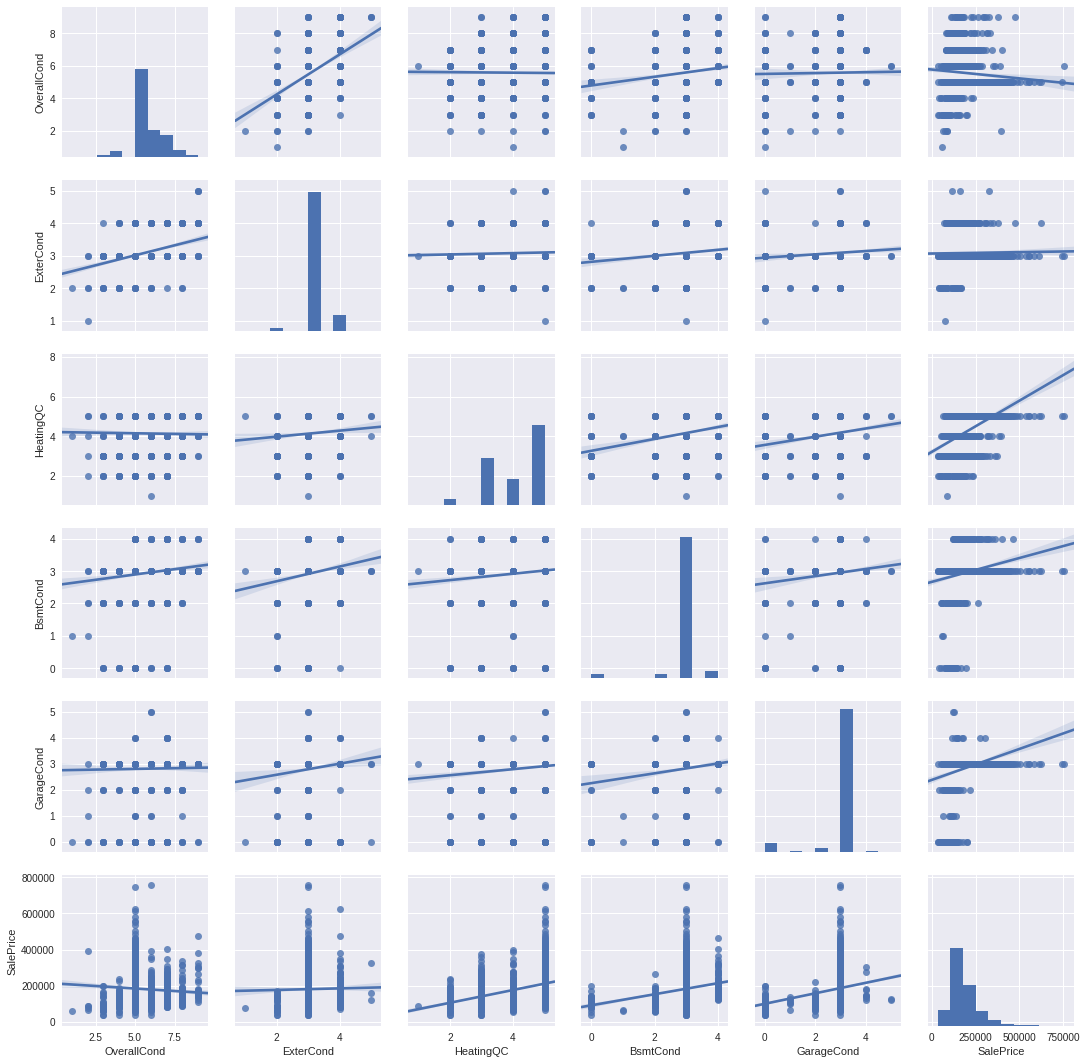

In [0]:
_ = sns.pairplot(ames_train[['OverallCond', 'ExterCond', 'HeatingQC', 'BsmtCond', 'GarageCond', 'SalePrice']], kind='reg', dropna=True)
plt.show()

## Cleaning the Training Set Cont.

### Exploring Outliers

Some machine learning algorithms are sensitive to outliers.  Because many variables included a value reflective of the feature not existing, variables consistent across the dataset to compare with the response should be analyzed to identify those outliers.  The variable best suited for this analysis is GrLivArea or above ground living area in square feet.   

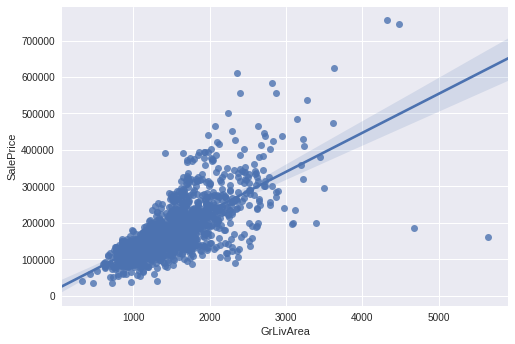

In [0]:
sns.regplot(x=ames_train['GrLivArea'],y=ames_train['SalePrice'],fit_reg=True)
#sns.pairplot(data=ames_train, y_vars=['SalePrice'], x_vars=['GrLivArea'])
plt.show()

In [0]:
temp=ames_train[(ames_train.GrLivArea>4000) & (ames_train.SalePrice<300000) | (ames_train.GrLivArea>4000) & (ames_train.SalePrice>700000)]
temp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,5,40094,1,1,1,3,0,0,7,5,5,0,3,10,5,2007,2008,3,1,5,5,4,762.0,5,3,2,5,3,4,6,2260,1,0,878,3138,1,5,1,0,3138,1538,0,4676,1,0,3,1,3,1,5,11,7,1,4,3,3,884,3,3,2,208,406,0,0,0,0,0,10,2007,3,5,184750
691,692,60,5,21535,1,1,0,3,1,0,13,2,2,0,3,10,6,1994,1995,1,7,6,6,2,1170.0,5,3,2,5,3,4,6,1455,1,0,989,2444,1,5,1,0,2444,1872,0,4316,0,1,3,1,4,1,5,10,7,2,2,3,3,832,3,3,2,382,50,0,0,0,0,0,1,2007,0,0,755000
1182,1183,60,5,15623,1,1,0,3,1,0,13,2,2,0,3,10,5,1996,1996,3,1,15,7,0,0.0,4,3,2,5,3,3,6,2096,1,0,300,2396,1,5,1,0,2411,2065,0,4476,1,0,3,1,4,1,5,10,7,2,2,3,3,813,3,3,2,171,78,0,0,0,555,0,7,2007,0,1,745000
1298,1299,60,5,63887,1,3,1,3,1,0,7,1,2,0,3,10,5,2008,2008,3,0,13,13,4,796.0,5,3,2,5,3,4,6,5644,1,0,466,6110,1,5,1,0,4692,950,0,5642,2,0,2,1,3,1,5,12,7,3,2,3,2,1418,3,3,2,214,292,0,0,0,480,0,1,2008,3,5,160000


### Removing Outliers

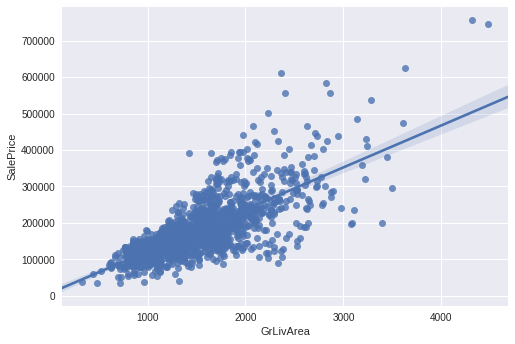

In [0]:
ames_train=ames_train.drop(ames_train[(ames_train['GrLivArea']>4000) & (ames_train['SalePrice']<300000)].index)
#ames_train=ames_train.drop(ames_train[(ames_train['GrLivArea']>4000) & (ames_train['SalePrice']>700000)].index)
sns.regplot(x=ames_train['GrLivArea'],y=ames_train['SalePrice'],fit_reg=True)
plt.show()

#### Updated Skew Values

In [0]:
ames_train.skew()

Id                0.000165
MSSubClass        1.407011
MSZoning         -0.759259
LotArea          12.573925
Street          -15.508026
LotShape          1.286484
LandContour       3.479112
Utilities       -38.183766
LotConfig         1.994516
LandSlope         4.809982
Neighborhood      0.041457
Condition1        3.358130
Condition2       15.415950
BldgType          2.210658
HouseStyle        1.177978
OverallQual       0.200786
OverallCond       0.691035
YearBuilt        -0.612295
YearRemodAdd     -0.501838
RoofStyle         1.482172
RoofMatl          8.130947
Exterior1st      -0.542117
Exterior2nd      -0.571824
MasVnrType        1.015957
MasVnrArea        2.696329
ExterQual         0.820047
ExterCond         1.395464
Foundation        0.093927
BsmtQual         -1.294561
BsmtCond         -3.698126
BsmtExposure      1.110157
BsmtFinType1     -0.156885
BsmtFinSF1        0.764789
BsmtFinType2      3.300079
BsmtFinSF2        4.251925
BsmtUnfSF         0.920903
TotalBsmtSF       0.511703
H

## Cleaning the Testing Set

### Missing/Null Values?

In [0]:
print(ames_test.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Dropping Columns with Significant Missing Data

In [0]:
ames_test = ames_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage','GarageYrBlt'],axis = 1)

#### Dealing with Smaller Amounts of Missing Values

##### MSZoning

In [0]:
tempames = ames_test[['MSZoning']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,MSZoning
455,NaN
756,NaN
790,NaN
1444,NaN


Given the data description file, a home has to have a zoning type.  Therefore, the mode value will be filled in.

In [0]:
ames_test['MSZoning'] = ames_test['MSZoning'].fillna(ames_test['MSZoning'].mode()[0])

##### Utilities

In [0]:
tempames = ames_test[['Utilities']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Utilities
455,NaN
485,NaN


Given the data description file, a home has to have utilities.  Therefore, the mode value is filled in.

In [0]:
ames_test['Utilities'] = ames_test['Utilities'].fillna(ames_test['Utilities'].mode()[0])

##### Exterior 1st and 2nd

In [0]:
tempames = ames_test[['ExterCond', 'Exterior1st', 'Exterior2nd']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,ExterCond,Exterior1st,Exterior2nd
691,TA,NaN,NaN


Given that the material was rated as being in a quality and the training set does not have missing values for either of the exterior matieral columns, that suggests a data error.  The mode value will be filled in.

In [0]:
ames_test['Exterior1st'] = ames_test['Exterior1st'].fillna(ames_test['Exterior1st'].mode()[0])
ames_test['Exterior2nd'] = ames_test['Exterior2nd'].fillna(ames_test['Exterior2nd'].mode()[0])

##### MasVnrType and MasVnrArea

In [0]:
tempames = ames_test[['Id','MasVnrType', 'MasVnrArea']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Id,MasVnrType,MasVnrArea
231,1692,NaN,NaN
246,1707,NaN,NaN
422,1883,NaN,NaN
532,1993,NaN,NaN
544,2005,NaN,NaN
581,2042,NaN,NaN
851,2312,NaN,NaN
865,2326,NaN,NaN
880,2341,NaN,NaN
889,2350,NaN,NaN


Where area is null, the type will be identified as none.  The type for 2611 will be the mode value, given that it does have an area value.  This represents a data error.

In [0]:
ames_test.loc[1150, 'MasVnrType'] = 'BrkFace'

##### Basement Features

In [0]:
tempames = ames_test[['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
27,1488,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
125,1586,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
133,1594,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
269,1730,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
318,1779,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
354,1815,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
387,1848,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
388,1849,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
396,1857,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
397,1858,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


Id 1488 has a basement, BsmtExposure should be filled in as No for no exposure. The same applies for Id 2349.

Ids 2525, 2041 and 2186 have a null value for BsmtCond, despite a basement obviously being present. That will be filled in with TA, the value representing typical condition. The same holds true for Ids 2218 and 2219 and BsmtQual.

Other null values correspond to those homes that lack a basement. A NA value will be filled in for those columns.

In [0]:
ames_test.loc[27, 'BsmtExposure'] = 'No'
ames_test.loc[888, 'BsmtExposure'] = 'No'
ames_test.loc[1064, 'BsmtCond'] = 'TA'
ames_test.loc[580, 'BsmtCond'] = 'TA'
ames_test.loc[725, 'BsmtCond'] = 'TA'
ames_test.loc[757, 'BsmtQual'] = 'TA'
ames_test.loc[758, 'BsmtQual'] = 'TA'
ames_test['BsmtFinType1'] = ames_test['BsmtFinType1'].fillna('NA')
ames_test['BsmtFinType2'] = ames_test['BsmtFinType2'].fillna('NA')
ames_test['BsmtExposure'] = ames_test['BsmtExposure'].fillna('NA')
ames_test['BsmtQual'] = ames_test['BsmtQual'].fillna('NA')
ames_test['BsmtCond'] = ames_test['BsmtCond'].fillna('NA')

##### Garage Features

In [0]:
tempames = ames_test[['Id', 'GarageType','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Id,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
53,1514,NaN,NaN,0.0,0.0,NaN,NaN
71,1532,NaN,NaN,0.0,0.0,NaN,NaN
79,1540,NaN,NaN,0.0,0.0,NaN,NaN
92,1553,NaN,NaN,0.0,0.0,NaN,NaN
96,1557,NaN,NaN,0.0,0.0,NaN,NaN
98,1559,NaN,NaN,0.0,0.0,NaN,NaN
100,1561,NaN,NaN,0.0,0.0,NaN,NaN
130,1591,NaN,NaN,0.0,0.0,NaN,NaN
133,1594,NaN,NaN,0.0,0.0,NaN,NaN
134,1595,NaN,NaN,0.0,0.0,NaN,NaN


ID 2127 has a detached garage,includes an area and can hold a car. The related columns for that record will be filled in with the mode value. ID 2577 has a garage, but has a null value for other columns. This suggests a data error. The type will be replaced with NA, the value for no garage. All other null values will be filled in with NA to reflect the lack of a garage.

In [0]:
ames_test.loc[666, 'GarageFinish'] = ames_test['GarageFinish'].mode()[0]
ames_test.loc[666, 'GarageQual'] = ames_test['GarageQual'].mode()[0]
ames_test.loc[666, 'GarageCond'] = ames_test['GarageCond'].mode()[0]
ames_test.loc[1116, 'GarageType'] = 'NA'
ames_test['GarageType'] = ames_test['GarageType'].fillna('NA')
ames_test['GarageCond'] = ames_test['GarageCond'].fillna('NA')
ames_test['GarageQual'] = ames_test['GarageQual'].fillna('NA')
ames_test['GarageFinish'] = ames_test['GarageFinish'].fillna('NA')

##### SaleType

In [0]:
tempames = ames_test[['Id', 'SaleType']]
nans = lambda tempames: tempames[tempames.isnull().any(axis=1)]
nans(tempames)

,Id,SaleType
1029,2490,NaN


Given the data description file, a home has to have a SaleType. Therefore, the mode value is filled in.

In [0]:
ames_test.loc[1029, 'SaleType'] = ames_test['SaleType'].mode()[0]

### Other Data Errors

##### Exterior2nd

In [0]:
ames_test['Exterior2nd'] = ames_test['Exterior2nd'].replace('Brk Cmn', 'BrkComm').replace('CmentBd', 'CemntBd').replace('Wd Shng', 'WdShing')

In [0]:
print(ames_test.isnull().sum())

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType       15
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        1
BsmtFinType2      0
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0


### Encoding Categorical Variables

#### Mapping Variables Without Meaning to their Order

In [0]:
ames_test['MSZoning'] = ames_test['MSZoning'].replace('A', 0).replace('C (all)', 1).replace('FV', 2).replace('I', 3).replace('RH', 4).replace('RL', 5).replace('RP', 6).replace('RM', 7)
ames_test['Street'] = ames_test['Street'].replace('Grvl', 0).replace('Pave', 1)
ames_test['Utilities'] = ames_test['Utilities'].replace('AllPub', 3).replace('NoSewr', 2).replace('NoSeWa', 1).replace('ELO', 0)
ames_test['LotConfig'] = ames_test['LotConfig'].replace('Inside', 0).replace('Corner', 1).replace('CulDSac', 2).replace('FR2', 3).replace('FR3', 4)
ames_test['Neighborhood'] = ames_test['Neighborhood'].replace('Blmngtn',0).replace('Blueste',1).replace('BrDale',2).replace('BrkSide',3).replace('ClearCr',4).replace('CollgCr',5).replace('Crawfor',6).replace('Edwards',7).replace('Gilbert',8).replace('IDOTRR',9).replace('MeadowV',10).replace('Mitchel',11).replace('Names',12).replace('NAmes',12).replace('NoRidge',13).replace('NPkVill',14).replace('NridgHt',15).replace('NWAmes',16).replace('OldTown',17).replace('SWISU',18).replace('Sawyer',19).replace('SawyerW',20).replace('Somerst',21).replace('StoneBr',22).replace('Timber',23).replace('Veenker',24)
ames_test['Condition1'] = ames_test['Condition1'].replace('Artery', 0).replace('Feedr', 1).replace('Norm', 2).replace('RRNn', 3).replace('RRAn', 4).replace('PosN', 5).replace('PosA', 6).replace('RRNe', 7).replace('RRAe', 8)
ames_test['Condition2'] = ames_test['Condition2'].replace('Artery', 0).replace('Feedr', 1).replace('Norm', 2).replace('RRNn', 3).replace('RRAn', 4).replace('PosN', 5).replace('PosA', 6).replace('RRNe', 7).replace('RRAe', 8)
ames_test['HouseStyle'] = ames_test['HouseStyle'].replace('1Story', 0).replace('1.5Fin', 1).replace('1.5Unf', 2).replace('2Story', 3).replace('2.5Fin', 4).replace('2.5Unf', 5).replace('SFoyer', 6).replace('SLvl', 7)
ames_test['RoofStyle'] = ames_test['RoofStyle'].replace('Flat', 0).replace('Gable', 1).replace('Gambrel', 2).replace('Hip', 3).replace('Mansard', 4).replace('Shed', 5)
ames_test['RoofMatl'] = ames_test['RoofMatl'].replace('ClyTile', 0).replace('CompShg', 1).replace('Membran', 2).replace('Metal', 3).replace('Roll', 4).replace('Tar&Grv', 5).replace('WdShake', 6).replace('WdShngl', 7)
ames_test['Exterior1st'] = ames_test['Exterior1st'].replace('AsbShng', 0).replace('AsphShn', 1).replace('BrkComm', 2).replace('BrkFace', 3).replace('CBlock', 4).replace('CemntBd', 5).replace('HdBoard', 6).replace('ImStucc', 7).replace('MetalSd', 8).replace('Other', 9).replace('Plywood', 10).replace('PreCast', 11).replace('Stone', 12).replace('Stucco', 13).replace('VinylSd', 14).replace('Wd Sdng', 15).replace('WdShing', 16)
ames_test['Exterior2nd'] = ames_test['Exterior2nd'].replace('AsbShng', 0).replace('AsphShn', 1).replace('BrkComm', 2).replace('BrkFace', 3).replace('CBlock', 4).replace('CemntBd', 5).replace('HdBoard', 6).replace('ImStucc', 7).replace('MetalSd', 8).replace('Other', 9).replace('Plywood', 10).replace('PreCast', 11).replace('Stone', 12).replace('Stucco', 13).replace('VinylSd', 14).replace('Wd Sdng', 15).replace('WdShing', 16)
ames_test['MasVnrType'] = ames_test['MasVnrType'].replace('BrkCmn', 1).replace('BrkFace', 2).replace('CBlock', 3).replace('None', 0).replace('Stone', 4)
ames_test['Foundation'] = ames_test['Foundation'].replace('BrkTil', 0).replace('CBlock', 1).replace('PConc', 2).replace('Slab', 3).replace('Stone', 4).replace('Wood', 5)
ames_test['Heating'] = ames_test['Heating'].replace('Floor', 0).replace('GasA', 1).replace('GasW', 2).replace('Grav', 3).replace('OthW', 4).replace('Wall', 5)
ames_test['Electrical'] = ames_test['Electrical'].replace('SBrkr', 0).replace('FuseA', 1).replace('FuseF', 2).replace('FuseP', 3).replace('Mix', 4)
ames_test['Functional'] = ames_test['Functional'].replace('Typ', 7).replace('Min1', 6).replace('Min2', 5).replace('Mod', 4).replace('Maj1', 3).replace('Maj2', 2).replace('Sev', 1).replace('Sal', 0)
ames_test['SaleType'] = ames_test['SaleType'].replace('WD', 0).replace('CWD', 1).replace('VWD', 2).replace('New', 3).replace('COD', 4).replace('Con', 5).replace('ConLw', 6).replace('ConLI', 7).replace('ConLD', 8).replace('Oth', 9)
ames_test['SaleCondition'] = ames_test['SaleCondition'].replace('Normal', 0).replace('Abnorml', 1).replace('AdjLand', 2).replace('Alloca', 3).replace('Family', 4).replace('Partial', 5)
ames_test['LandContour'] = ames_test['LandContour'].replace('Lvl', 0).replace('Bnk', 1).replace('HLS', 2).replace('Low', 3)
ames_test['BldgType'] = ames_test['BldgType'].replace('1Fam', 0).replace('2fmCon', 1).replace('Duplex', 2).replace('TwnhsE', 3).replace('Twnhs', 4)

#### Mapping Variables With Meaning to their Order

In [0]:
ames_test['LotShape'] = ames_test['LotShape'].replace('Reg', 0).replace('IR1', 1).replace('IR2', 2).replace('IR3', 3)
ames_test['LandSlope'] = ames_test['LandSlope'].replace('Gtl', 0).replace('Mod', 1).replace('Sev', 2)
ames_test['ExterQual'] = ames_test['ExterQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['ExterCond'] = ames_test['ExterCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['BsmtQual'] = ames_test['BsmtQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['BsmtCond'] = ames_test['BsmtCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['HeatingQC'] = ames_test['HeatingQC'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['KitchenQual'] = ames_test['KitchenQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['GarageQual'] = ames_test['GarageQual'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['GarageCond'] = ames_test['GarageCond'].replace("NA",0).replace("Po",1).replace("Fa",2).replace("TA",3).replace("Gd",4).replace("Ex",5)
ames_test['BsmtExposure'] = ames_test['BsmtExposure'].replace('Gd', 4).replace('Av', 3).replace('Mn', 2).replace('No', 1).replace('NA', 0)
ames_test['BsmtFinType1'] = ames_test['BsmtFinType1'].replace('NA', 0).replace('Unf', 1).replace('LwQ', 2).replace('Rec', 3).replace('BLQ', 4).replace('ALQ', 5).replace('GLQ', 6)
ames_test['BsmtFinType2'] = ames_test['BsmtFinType2'].replace('NA', 0).replace('Unf', 1).replace('LwQ', 2).replace('Rec', 3).replace('BLQ', 4).replace('ALQ', 5).replace('GLQ', 6)
ames_test['CentralAir'] = ames_test['CentralAir'].replace('N', 0).replace('Y', 1)
ames_test['GarageType'] = ames_test['GarageType'].replace('NA', 0).replace('2Types', 1).replace('Attchd', 2).replace('Basment', 3).replace('BuiltIn', 4).replace('CarPort', 5).replace('Detchd', 6)
ames_test['GarageFinish'] = ames_test['GarageFinish'].replace('Fin', 3).replace('RFn', 2).replace('Unf', 1).replace('NA', 0)
ames_test['PavedDrive'] = ames_test['PavedDrive'].replace('Y', 2).replace('P', 1).replace('N', 0)
ames_test['MasVnrArea'] = ames_test['MasVnrArea'].replace('None', 0)
ames_test = ames_test.fillna(0)

## Modeling

In [0]:
ames_train_2 = ames_train.copy()

In [0]:
# Applying a log(1+x) transformation to SalePrice
ames_train["SalePrice"] = np.log1p(ames_train["SalePrice"])

# Applying log(1+x) Transformation to all numeric feature that are skewed in nature:
numeric_col_train = ames_train.dtypes[ames_train.dtypes != "object"].index
numeric_col_test = ames_test.dtypes[ames_test.dtypes != "object"].index

# Calculating the skewness of the column
skewed_feats = ames_train[numeric_col_train].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

# Calculating the skewness of the column
skewed_feats_tes = ames_test[numeric_col_test].apply(lambda x: skew(x.dropna()))
skewed_feats_tes = skewed_feats_tes[skewed_feats_tes > 0.75]
skewed_feats_tes = skewed_feats_tes.index

# Fix for skewness
ames_train[skewed_feats] = np.log1p(ames_train[skewed_feats])
ames_test[skewed_feats_tes] = np.log1p(ames_test[skewed_feats_tes])

X=ames_train.loc[:, ames_train.columns != 'SalePrice']
X=X.loc[:, X.columns != 'Id']
Y=ames_train.SalePrice

#for col in X:
    #X[col] = np.log1p(X[col])
    
#Y = np.log1p(Y)    

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state=0)

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

test=ames_test.loc[:, ames_test.columns != 'Id']

kfolds=10

In [0]:
def run_model(X):
    fitted_model = X.fit(X_trainval,Y_trainval)
    print("Test Score of Training Set: " + str(fitted_model.score(X_test,Y_test)))
    print("Test RMSE of Training Set: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test), Y_test))))
    
    print("Train RMSE of Training Set: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_trainval), Y_trainval))))
    print("Difference: " + str((np.sqrt(mean_squared_error(fitted_model.predict(X_trainval), Y_trainval)))-(np.sqrt(mean_squared_error(fitted_model.predict(X_test), Y_test)))))

    
def plot_fi(X):
    fitted_model = X.fit(X_trainval,Y_trainval)
    importances = list(zip(X.feature_importances_, X_trainval.columns))
    importances.sort(reverse=True)
    pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar', figsize=(15,5), legend=False, title= "Feature Importance")

def plot_fi_fs(X):
    fitted_model = X.fit(X_trainval_transformed,Y_trainval)
    importances = list(zip(X.feature_importances_, X_trainval.columns))
    importances.sort(reverse=True)
    pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar', figsize=(15,5), legend=False, title= "Feature Importance")
    
    
def run_model_fs(X):
    fitted_model = X.fit(X_trainval_transformed,Y_trainval)
    print("Test Score of Training Set: " + str(fitted_model.score(X_test_transformed,Y_test)))
    print("Test RMSE of Training Set: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_transformed), Y_test))))
    
    print("Train RMSE of Training Set: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_trainval_transformed), Y_trainval))))
    print("Difference: " + str((np.sqrt(mean_squared_error(fitted_model.predict(X_trainval_transformed), Y_trainval)))-(np.sqrt(mean_squared_error(fitted_model.predict(X_test_transformed), Y_test)))))
    
def predict(X):
    fitted_model = X.fit(X_trainval,Y_trainval)
    y_pred = fitted_model.predict(test)
    y_pred = np.exp(y_pred)

    output = pd.DataFrame()
    output['Id'] = ames_test['Id']
    output['SalePrice'] = y_pred
    output.to_csv('gdrive/My Drive/Machine Learning Project/output.csv', index=False)
    # Remove file path to function on local system
    
def predict_fs(X):
    scaler=preprocessing.StandardScaler().fit(test) #define scaler depending onthe features in training data 
    test=scaler.transform(test) #apply scaling on training set 
    
    fitted_model = X.fit(X_trainval_transformed,Y_trainval)
    y_pred = fitted_model.predict(test)
    y_pred = np.exp(y_pred)

    output = pd.DataFrame()
    output['Id'] = ames_test['Id']
    output['SalePrice'] = y_pred
    output.to_csv('gdrive/My Drive/Machine Learning Project/output.csv', index=False)
    # Remove file path to function on local system
 
def run_model_pca(X):
    fitted_model=X.fit(X_train_pca,Y_trainval)
    print("Test Score of Training Set: " + str(fitted_model.score(X_test_pca,Y_test)))
    print("Test RMSE of Training Set: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test))))
    
    print("Train RMSE of Training Set: " + str(np.sqrt(mean_squared_error(fitted_model.predict(X_train_pca), Y_trainval))))
    print("Difference: " + str((np.sqrt(mean_squared_error(fitted_model.predict(X_train_pca), Y_trainval)))-(np.sqrt(mean_squared_error(fitted_model.predict(X_test_pca), Y_test)))))

### Linear Regression

In [0]:
run_model(LinearRegression())

Test Score of Training Set: 0.9269003072184276
Test RMSE of Training Set: 0.11399384497968564
Train RMSE of Training Set: 0.11555895117998242
Difference: 0.0015651062002967897


#### With Feature Scaling

In [0]:
run_model_fs(LinearRegression())

Test Score of Training Set: 0.9269003072184261
Test RMSE of Training Set: 0.11399384497968686
Train RMSE of Training Set: 0.11555895117998247
Difference: 0.00156510620029561


### KNN Regression

In [0]:
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
run_model(neighbors.KNeighborsRegressor(n_neighbors=best_parameters))

Best K Parameter: 8
Test Score of Training Set: 0.679516997995156
Test RMSE of Training Set: 0.23868554947106405
Train RMSE of Training Set: 0.21083042081036163
Difference: -0.027855128660702416


#### With Feature Scaling

In [0]:
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
run_model_fs(neighbors.KNeighborsRegressor(n_neighbors=best_parameters))

Best K Parameter: 15
Test Score of Training Set: 0.81535588374268
Test RMSE of Training Set: 0.1811721187543782
Train RMSE of Training Set: 0.16640677618927385
Difference: -0.014765342565104339


#### With PCA

In [0]:
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_train_pca, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
run_model_pca(neighbors.KNeighborsRegressor(n_neighbors=best_parameters))

Best K Parameter: 9
Test Score of Training Set: 0.8450739542847512
Test RMSE of Training Set: 0.16595328163879236
Train RMSE of Training Set: 0.14992272404720072
Difference: -0.016030557591591638


### Ridge Regression

In [0]:
best_score = 0

for a in (.001,.01,.1,1,10,100,1000):
    RidgeModel=Ridge(alpha=a)
    scores = cross_val_score(RidgeModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = a
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model(Ridge(alpha=best_parameters))

Best Alpha Parameter: 1
Test Score of Training Set: 0.9273913527060076
Test RMSE of Training Set: 0.1136103243192812
Train RMSE of Training Set: 0.11568352755233774
Difference: 0.002073203233056542


#### With Feature Scaling

In [0]:
best_score = 0

for a in (.001,.01,.1,1,10,100,1000):
    RidgeModel=Ridge(alpha=a)
    scores = cross_val_score(RidgeModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = a
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model_fs(Ridge(alpha=best_parameters))

Best Alpha Parameter: 100
Test Score of Training Set: 0.9247707282256117
Test RMSE of Training Set: 0.11564238916259408
Train RMSE of Training Set: 0.11690254000414048
Difference: 0.0012601508415464036


### Lasso Regression

In [0]:
best_score = 0

for alpha in (.001,.01,.1,1,10,100,1000):
    LassoModel=Lasso(alpha=alpha)
    scores = cross_val_score(LassoModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = alpha
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model(Lasso(alpha=best_parameters))

Best Alpha Parameter: 0.001
Test Score of Training Set: 0.9311914360084149
Test RMSE of Training Set: 0.11059738891230637
Train RMSE of Training Set: 0.11921703601083004
Difference: 0.00861964709852367


#### With Feature Scaling

In [0]:
best_score = 0

for alpha in (.001,.01,.1,1,10,100,1000):
    LassoModel=Lasso(alpha=alpha)
    scores = cross_val_score(LassoModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = alpha
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model_fs(Lasso(alpha=best_parameters))

Best Alpha Parameter: 0.001
Test Score of Training Set: 0.9289629136933181
Test RMSE of Training Set: 0.11237409226431591
Train RMSE of Training Set: 0.11612468163464873
Difference: 0.0037505893703328186


### Decision Trees

Best Max_Depth Parameter: 7
Test Score of Training Set: 0.830061438913026
Test RMSE of Training Set: 0.17380793308418652
Train RMSE of Training Set: 0.10431076551454412
Difference: -0.0694971675696424


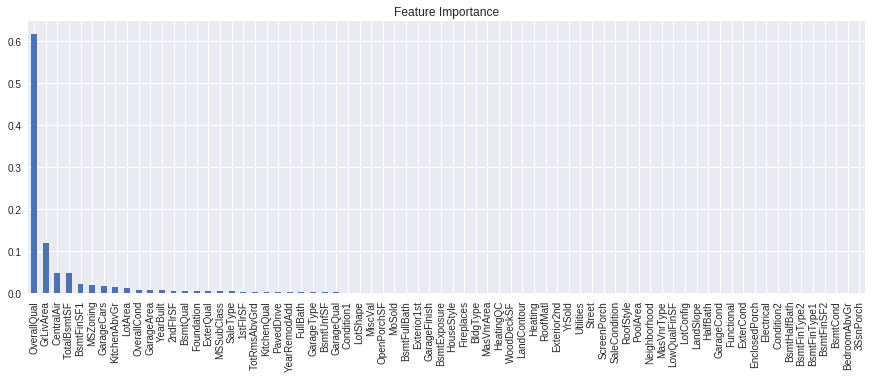

In [0]:
best_score = 0

for m in range(1,11):
    TreeModel=DecisionTreeRegressor(max_depth = m)
    scores = cross_val_score(TreeModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = m
    
print("Best Max_Depth Parameter: " + str(best_parameters))
run_model(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))
plot_fi(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))

#### With Feature Scaling

Best Max_Depth Parameter: 7
Test Score of Training Set: 0.830061438913026
Test RMSE of Training Set: 0.17380793308418652
Train RMSE of Training Set: 0.10431076551454412
Difference: -0.0694971675696424


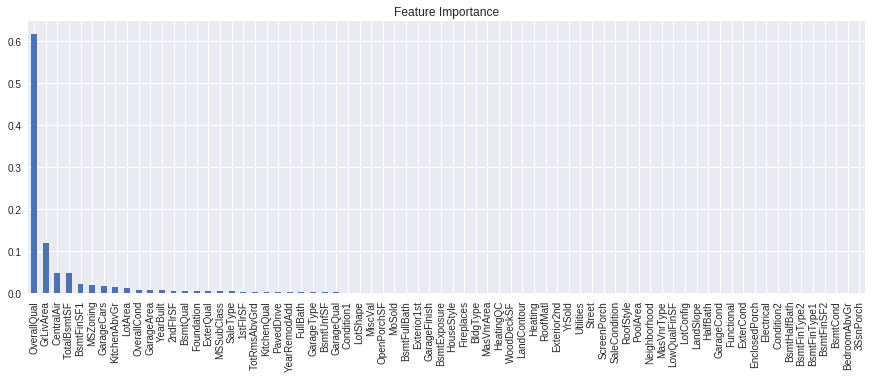

In [0]:
best_score = 0

for m in range (1,11):
    TreeModel=DecisionTreeRegressor(max_depth=m)
    scores = cross_val_score(TreeModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = m
    
print("Best Max_Depth Parameter: " + str(best_parameters))
run_model_fs(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))
plot_fi_fs(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))

### Random Forest

Best Max_Depth Parameter: 10
Best N_Estimators Parameter: 10
Best Max_Features Parameter: 10
Test Score of Training Set: 0.8905606308845639
Test RMSE of Training Set: 0.13947951130547653
Train RMSE of Training Set: 0.07743589220548384
Difference: -0.06204361909999269


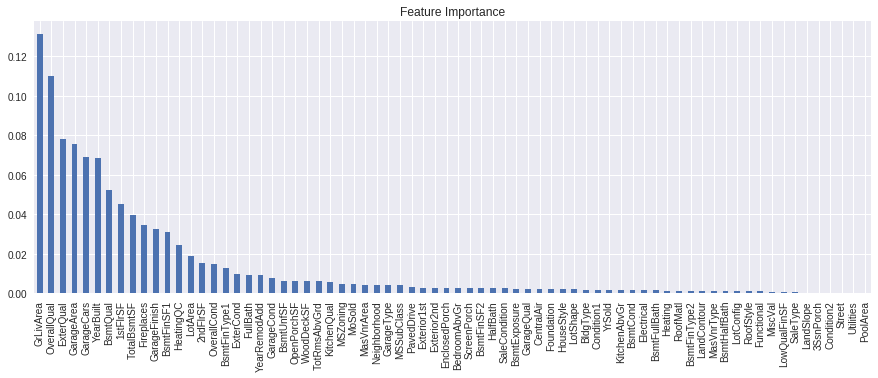

In [0]:
best_score = 0

for f in range (1,11):
    for n in range (1,11):
        for m in range(1,11):
            RFModel=RandomForestRegressor(n_estimators = n, max_features = f, max_depth = m)
            scores = cross_val_score(RFModel, X_trainval, Y_trainval, cv=kfolds)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters_m = m
                best_parameters_n = n
                best_parameters_f = f
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
print("Best Max_Features Parameter: " + str(best_parameters_f))
run_model(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))
plot_fi(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))

#### With Feature Scaling

Best Max_Depth Parameter: 10
Best N_Estimators Parameter: 9
Best Max_Features Parameter: 9
Test Score of Training Set: 0.8808505897128588
Test RMSE of Training Set: 0.14553571211943295
Train RMSE of Training Set: 0.08363768476991834
Difference: -0.061898027349514606


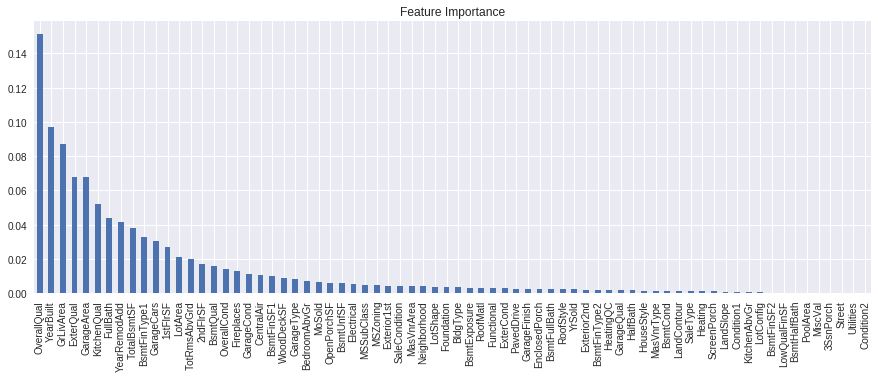

In [0]:
best_score = 0

for f in range (1,11):
    for n in range (1,11):
        for m in range(1,11):
            RFModel=RandomForestRegressor(n_estimators = n, max_features = f, max_depth = m)
            scores = cross_val_score(RFModel, X_trainval_transformed, Y_trainval, cv=kfolds)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters_m = m
                best_parameters_n = n
                best_parameters_f = f
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
print("Best Max_Features Parameter: " + str(best_parameters_f))
run_model_fs(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))
plot_fi_fs(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))

### AdaBoost

Best Max_Depth Parameter: 5
Best N_Estimators Parameter: 400
Test Score of Training Set: 0.9031704171140209
Test RMSE of Training Set: 0.13119813368861136
Train RMSE of Training Set: 0.08762190633814426
Difference: -0.043576227350467095


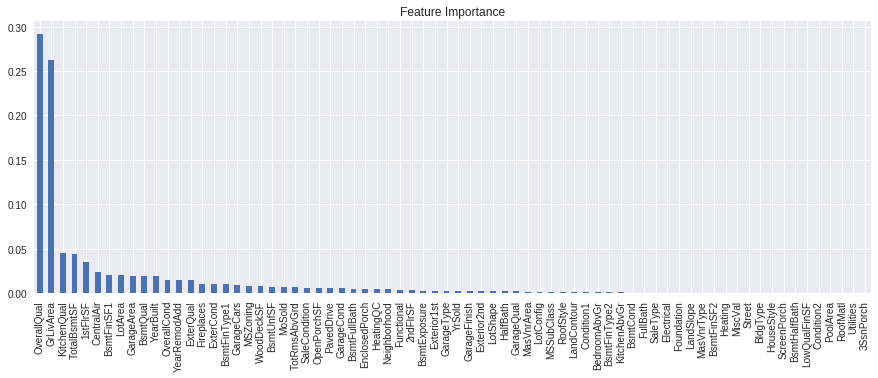

In [0]:
best_score = 0

for n in (50,100,200,400,800,1600):
    for m in range(1,6):
        ABModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = m), n_estimators = n) 
        scores = cross_val_score(ABModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))
plot_fi(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))

#### With Feature Scaling

Best Max_Depth Parameter: 5
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.9011352175133744
Test RMSE of Training Set: 0.13256974907656494
Train RMSE of Training Set: 0.08681571644347305
Difference: -0.045754032633091885


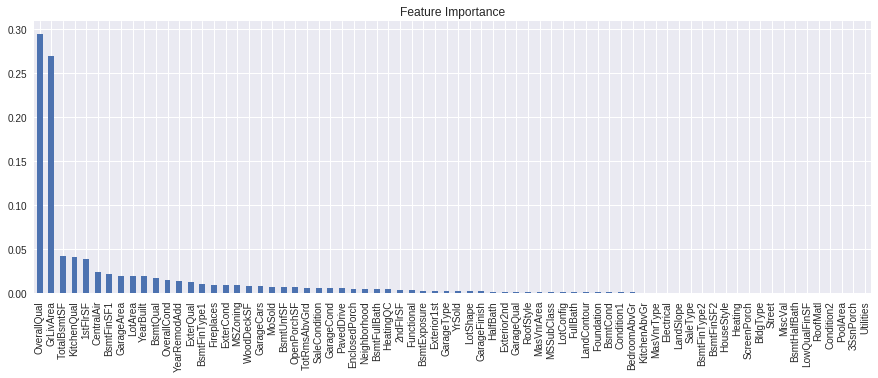

In [0]:
best_score = 0

for n in (50,100,200,400,800,1600):
    for m in range(1,6):
        ABModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = m), n_estimators = n) 
        scores = cross_val_score(ABModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model_fs(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))
plot_fi_fs(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))

### Gradient Boost

Best Max_Depth Parameter: 1
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.9331326154828861
Test RMSE of Training Set: 0.10902617976172947
Train RMSE of Training Set: 0.08865080389775973
Difference: -0.020375375863969744


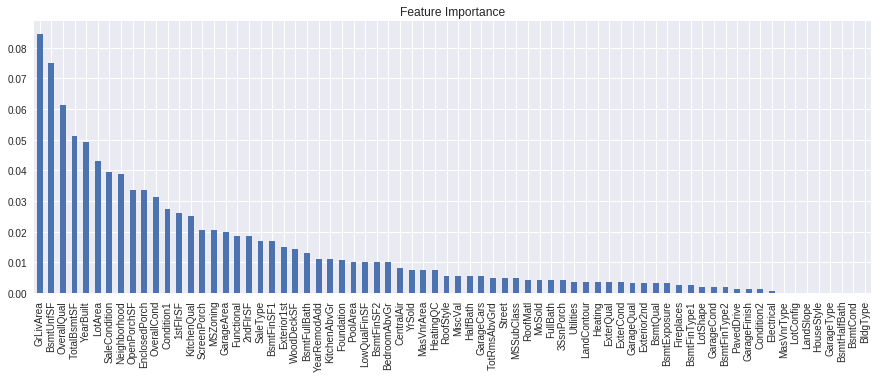

In [0]:
best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        GBModel=GradientBoostingRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(GBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

#### With Feature Scaling

Best Max_Depth Parameter: 1
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.9331326154828862
Test RMSE of Training Set: 0.10902617976172939
Train RMSE of Training Set: 0.08865080389775977
Difference: -0.02037537586396962


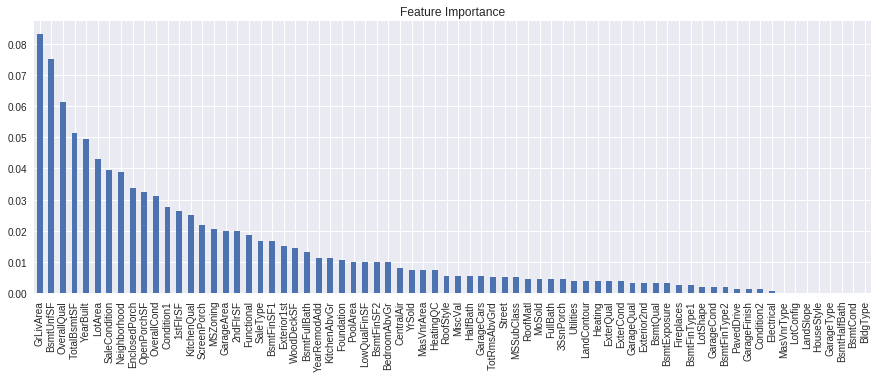

In [0]:
best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        GBModel=GradientBoostingRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(GBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model_fs(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi_fs(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

##### Prediction

In [0]:
predict(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

### Support Vector Regression

In [0]:
best_score = 0

for c in (.01,.1,1,10,100):
    svmModel=LinearSVR(C = c) 
    scores = cross_val_score(svmModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters_c = c
    
print("Best C Parameter: " + str(best_parameters_c))
run_model(LinearSVR(C=best_parameters_c))

Best C Parameter: 0.1
Test Score of Training Set: 0.8263735343775944
Test RMSE of Training Set: 0.17568374841304396
Train RMSE of Training Set: 0.1879144269544759
Difference: 0.01223067854143195


#### With Feature Scaling

In [0]:
best_score = 0

for c in (.01,.1,1,10,100):
    svmModel=LinearSVR(C = c) 
    scores = cross_val_score(svmModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters_c = c
    
print("Best C Parameter: " + str(best_parameters_c))
run_model_fs(LinearSVR(C=best_parameters_c))

Best C Parameter: 10
Test Score of Training Set: 0.8354809458294208
Test RMSE of Training Set: 0.1710140249986373
Train RMSE of Training Set: 0.17542095143453096
Difference: 0.00440692643589366


### XGBoost

Best Max_Depth Parameter: 1
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.932541058531738
Test RMSE of Training Set: 0.10950737982465557
Train RMSE of Training Set: 0.08956242298410672
Difference: -0.019944956840548853


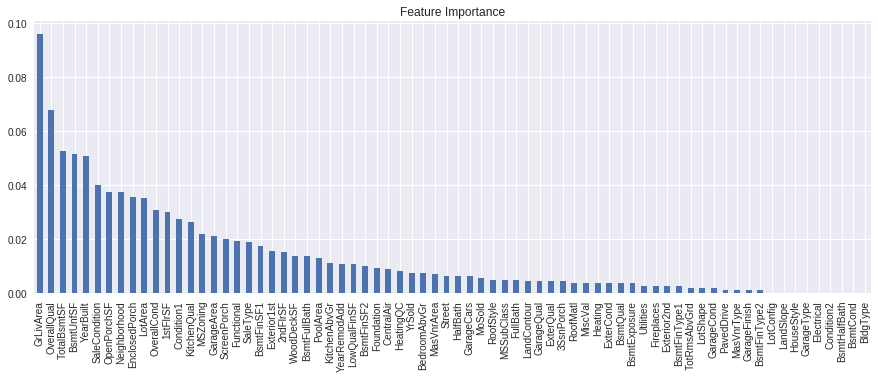

In [0]:
#!pip install xgboost

from xgboost import XGBRegressor

best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        XGBModel=XGBRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(XGBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

#### With Feature Scaling

Best Max_Depth Parameter: 1
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.932541058531738
Test RMSE of Training Set: 0.10950737982465557
Train RMSE of Training Set: 0.08956242298410672
Difference: -0.019944956840548853


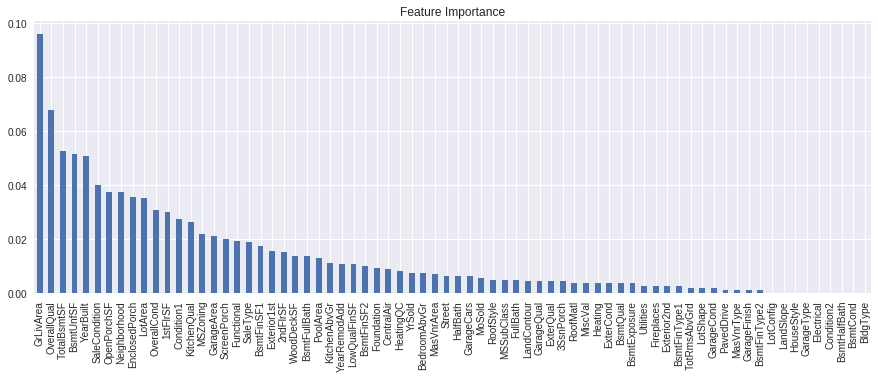

In [0]:
from xgboost import XGBRegressor

best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        XGBModel=XGBRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(XGBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model_fs(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi_fs(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

### Neural Network

#### scikit-learn Neural Network

In [0]:
from sklearn.neural_network import MLPRegressor

#best_score = 0

#for a in (.00001,.0001,.001,.01,.1,1):
    #for m in (200.400,800,1600):
        #MLPModel=MLPRegressor(activation = 'identity', alpha = a) 
        #scores = cross_val_score(MLPModel, X_trainval, Y_trainval, cv=kfolds)
        #score = np.mean(scores)
        #if score > best_score:
            #best_score = score
            #best_parameters_a = a
    
#print("Best Activation Function Parameter: " + str(best_parameters_ac))
#print("Best Alpha Parameter: " + str(best_parameters_a))
#print("Best Max Iterations Parameter: " + str(best_parameters_m))

#run_model_fs(MLPRegressor(activation = best_parameters_ac, alpha = best_parameters_a, max_iter = best_parameters_m))

run_model(MLPRegressor(activation = 'identity', alpha = .1, hidden_layer_sizes=(64,64), max_iter = 1000))

Test Score of Training Set: -78.0289945199987
Test RMSE of Training Set: 3.7481490677958837
Train RMSE of Training Set: 3.7443648889361953
Difference: -0.003784178859688403


##### With Feature Scaling

In [0]:
run_model_fs(MLPRegressor(activation = 'identity', alpha = .1, hidden_layer_sizes=(64,64), max_iter = 1000))

Test Score of Training Set: 0.9043348267535586
Test RMSE of Training Set: 0.13040689601789343
Train RMSE of Training Set: 0.1298711215657338
Difference: -0.0005357744521596319


#### Tensorflow Neural Network

##### Building Model

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.keras.activations.linear,kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(X_trainval_transformed.shape[1],)),
    keras.layers.Dense(64, activation=tf.keras.activations.linear, kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                4672      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


##### Training Model

In [0]:
EPOCHS = 1000

history = model.fit(X_trainval_transformed, Y_trainval, epochs=EPOCHS,
                    validation_split=0.25, verbose=0)

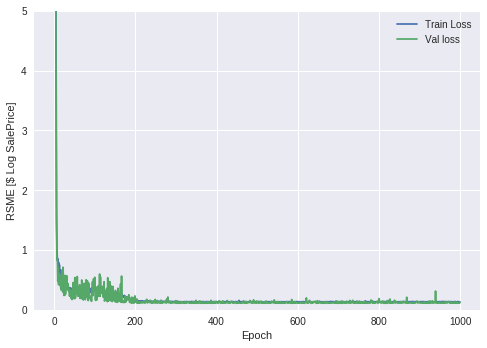

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('RSME [$ Log SalePrice]')
  plt.plot(history.epoch, np.array(np.sqrt(history.history['mean_squared_error'])),
           label='Train Loss')
  plt.plot(history.epoch, np.array(np.sqrt(history.history['val_mean_squared_error'])),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)

###### Stopping Parameter

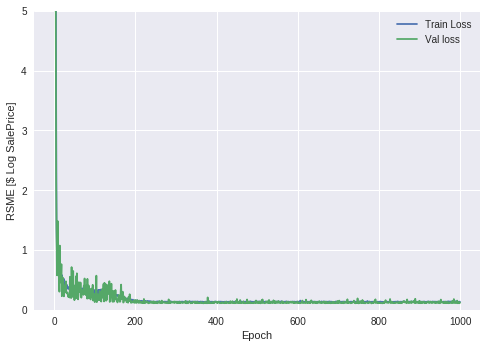

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

history = model.fit(X_trainval_transformed, Y_trainval, epochs=EPOCHS,
                    validation_split=0.25, verbose=0,
                    callbacks=[early_stop])

plot_history(history)

##### Evaluation

In [0]:
[loss, mse] = model.evaluate(X_test_transformed, Y_test, verbose=0)

print("Testing Set RSME: " + str(np.sqrt(mse)))

Testing Set RSME: 0.127499730322558


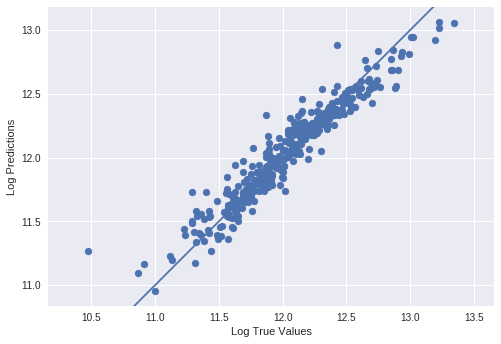

In [0]:
test_predictions = model.predict(X_test_transformed).flatten()

plt.scatter(Y_test, test_predictions)
plt.xlabel('Log True Values')
plt.ylabel('Log Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

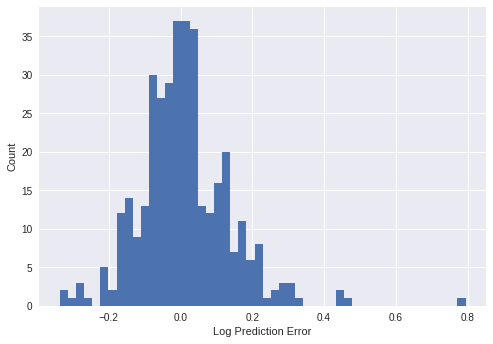

In [0]:
error = test_predictions - Y_test
plt.hist(error, bins = 50)
plt.xlabel("Log Prediction Error")
_ = plt.ylabel("Count")

##### Prediction

In [0]:
scaler=preprocessing.StandardScaler().fit(test)
test=scaler.transform(test)

y_pred = model.predict(test)
y_pred = np.exp(y_pred)

output = pd.DataFrame()
output['Id'] = ames_test['Id']
output['SalePrice'] = y_pred
output.to_csv('gdrive/My Drive/Machine Learning Project/output_tf.csv', index=False)

## Feature Engineering and Feature Selection

In [0]:
def transform_features(df):
    df['HasPorch'] = np.where(df['OpenPorchSF']>0, 1, 0)
    df['HasPorch'] = np.where(df['EnclosedPorch']>0, 1, df['HasPorch'])
    df['HasPorch'] = np.where(df['3SsnPorch']>0, 1, df['HasPorch'])
    df['HasPorch'] = np.where(df['ScreenPorch']>0, 1, df['HasPorch'])
    df = df.drop(['OpenPorchSF'],axis = 1)
    df = df.drop(['EnclosedPorch'],axis = 1)
    df = df.drop(['3SsnPorch'],axis = 1)
    df = df.drop(['ScreenPorch'],axis = 1)
    
    df['TempBath'] = np.where(df['HalfBath']>0, df['HalfBath']*.5, 0)
    df['TotalBath'] = df['TempBath']+df['FullBath']
    
    df = df.drop(['TempBath'],axis = 1)
    df = df.drop(['HalfBath'],axis = 1)
    df = df.drop(['FullBath'],axis = 1)
    
    df['TotalRooms'] = df['TotalBath']+df['TotRmsAbvGrd']
    df = df.drop(['TotalBath'],axis = 1)
    df = df.drop(['TotRmsAbvGrd'],axis = 1)
    
    #df['TotalSF'] = df['TotalBsmtSF']+df['GrLivArea']
    
    #df = df.drop(['TotalBsmtSF'],axis = 1)
    #df = df.drop(['GrLivArea'],axis = 1)
    
    #df["diff_remodel_sold"]=df.YrSold-df.YearRemodAdd
    #df["diff_built_sold"]=df.YrSold-df.YearBuilt
    #df["diff_built_remodel"]=df.YearRemodAdd-df.YearBuilt
    #drop columns that are not meaningful or they leak information in sale.
    #df = df.drop(["Id", "MoSold", "SaleCondition", "SaleType", "YearBuilt", "YearRemodAdd"], axis=1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10,var=0.015):
    df=df.select_dtypes(include=['integer','float'])
    corrmat = df.corr()
    
    sorted_corrs=corrmat['SalePrice'].abs().sort_values(ascending=False)
    #keeping only columns that have correlation with target higher than threshold
    strong_corrs=sorted_corrs[sorted_corrs>coeff_threshold]
    df=df.drop(sorted_corrs[sorted_corrs>coeff_threshold].index, axis=1)
    
    nominal_features = ["Id", "MSSubClass", "MSZoning", "Street", "Alley", "LandContour", 
                        "LotConfig", "Neighborhood","Condition1", "Condition2", "BldgType",
                        "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st","Exterior2nd",
                        "MasVnrType", "Foundation", "Heating", "CentralAir", "GarageType",
                        "MiscFeature", "SaleType", "SaleCondition"]
    
    #check to see if our current dataset still keeps the nominal features
    transform_cat_cols=[]
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)
    for col in transform_cat_cols:
        len(df[col].unique())>uniq_threshold
        df=df.drop(col, axis=1)
    #getting rid of nominal columns with too many unique values
    features=strong_corrs.index
    rescale_train=(df[features]-df[features].min())/(df[features].max()-df[features].min())
    sorted_vars=rescale_train.var().sort_values()
    features.drop(sorted_vars[sorted_vars<var].index)
    return features
  
def feature_Selection(df,corr,var):
    corrmat = df.corr()
    sorted_corrs=corrmat['SalePrice'].abs().sort_values(ascending=False)
    # Cutoff value for correlation
    a=corr #0.25

    #cutoff value for features variance(features with lower variance than this number will be dropped)
    b=var #0.015

    strong_corrs=sorted_corrs[sorted_corrs>a]
    #corrmatrix=ames_train_third[strong_corrs.index].corr()
    #fig,ax=plt.subplots(figsize=(8,6))
    #sns.heatmap(corrmatrix,ax=ax)
    #plt.title("Correlation Matrix")
    #plt.show()
    #Dropping the columns GarageCars and TotRMSABVGRD because they are highly correlated
    #final_cor_col=strong_corrs.drop(['GarageCars', 'TotRmsAbvGrd'])
    features=strong_corrs.drop(['SalePrice']).index
    #X_1=ames_train_third[features]
    #Y_1=ames_train_third.SalePrice
    rescale_train=(df[features]-df[features].min())/(df[features].max()-df[features].min())
    sorted_vars=rescale_train.var().sort_values()
    features.drop(sorted_vars[sorted_vars<b].index)
    return features

### Variance Subsetting

In [0]:
features_set2=feature_Selection(ames_train, 0.25,0.015)
ames_train_new2=ames_train[features_set2]

X=ames_train_new2
Y=ames_train.SalePrice

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state= 0)

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

N_components=2 # Define the number of principle components
pca = PCA(n_components=N_components).fit(X_trainval_transformed)

X_train_pca = pca.transform(X_trainval_transformed)
X_test_pca = pca.transform(X_test_transformed)

test=ames_test.loc[:, ames_test.columns != 'Id']

kfolds=10

#### Linear Regression

In [0]:
run_model(LinearRegression())

Test Score of Training Set: 0.9108389783666024
Test RMSE of Training Set: 0.12589577183330003
Train RMSE of Training Set: 0.13048061076012873
Difference: 0.004584838926828705


##### With Feature Scaling

In [0]:
run_model_fs(LinearRegression())

Test Score of Training Set: 0.9108389783666047
Test RMSE of Training Set: 0.12589577183329848
Train RMSE of Training Set: 0.13048061076012873
Difference: 0.004584838926830259


#### KNN Regression

In [0]:
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
run_model(neighbors.KNeighborsRegressor(n_neighbors=best_parameters))

Best K Parameter: 8
Test Score of Training Set: 0.6804497279821001
Test RMSE of Training Set: 0.23833796256547107
Train RMSE of Training Set: 0.21129522145421373
Difference: -0.027042741111257346


##### With Feature Scaling

In [0]:
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
run_model_fs(neighbors.KNeighborsRegressor(n_neighbors=best_parameters))

Best K Parameter: 10
Test Score of Training Set: 0.8484229472403869
Test RMSE of Training Set: 0.16414979923349007
Train RMSE of Training Set: 0.1500341812643329
Difference: -0.014115617969157168


##### With PCA

In [0]:
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_train_pca, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
run_model_pca(neighbors.KNeighborsRegressor(n_neighbors=best_parameters))

Best K Parameter: 13
Test Score of Training Set: 0.8684272774140669
Test RMSE of Training Set: 0.1529348837853289
Train RMSE of Training Set: 0.14539451022939207
Difference: -0.007540373555936841


#### Ridge Regression

In [0]:
best_score = 0

for a in (.001,.01,.1,1,10,100,1000):
    RidgeModel=Ridge(alpha=a)
    scores = cross_val_score(RidgeModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = a
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model(Ridge(alpha=best_parameters))

Best Alpha Parameter: 1
Test Score of Training Set: 0.9109132221052725
Test RMSE of Training Set: 0.12584334466719027
Train RMSE of Training Set: 0.13050266480581726
Difference: 0.004659320138626993


##### With Feature Scaling

In [0]:
best_score = 0

for a in (.001,.01,.1,1,10,100,1000):
    RidgeModel=Ridge(alpha=a)
    scores = cross_val_score(RidgeModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = a
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model_fs(Ridge(alpha=best_parameters))

Best Alpha Parameter: 100
Test Score of Training Set: 0.9103467828783481
Test RMSE of Training Set: 0.12624278473307474
Train RMSE of Training Set: 0.13133652324106787
Difference: 0.005093738507993134


#### Lasso Regression

In [0]:
best_score = 0

for alpha in (.001,.01,.1,1,10,100,1000):
    LassoModel=Lasso(alpha=alpha)
    scores = cross_val_score(LassoModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = alpha
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model(Lasso(alpha=best_parameters))

Best Alpha Parameter: 0.001
Test Score of Training Set: 0.9127781452831738
Test RMSE of Training Set: 0.12451918955685104
Train RMSE of Training Set: 0.13150735288969087
Difference: 0.006988163332839831


##### With Feature Scaling

In [0]:
best_score = 0

for alpha in (.001,.01,.1,1,10,100,1000):
    LassoModel=Lasso(alpha=alpha)
    scores = cross_val_score(LassoModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = alpha
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model_fs(Lasso(alpha=best_parameters))

Best Alpha Parameter: 0.001
Test Score of Training Set: 0.9118937583584165
Test RMSE of Training Set: 0.12514887922062126
Train RMSE of Training Set: 0.13064109874108454
Difference: 0.005492219520463276


#### Decision Trees

Best Max_Depth Parameter: 5
Test Score of Training Set: 0.8162958327058584
Test RMSE of Training Set: 0.1807103931799521
Train RMSE of Training Set: 0.15780720430600714
Difference: -0.022903188873944963


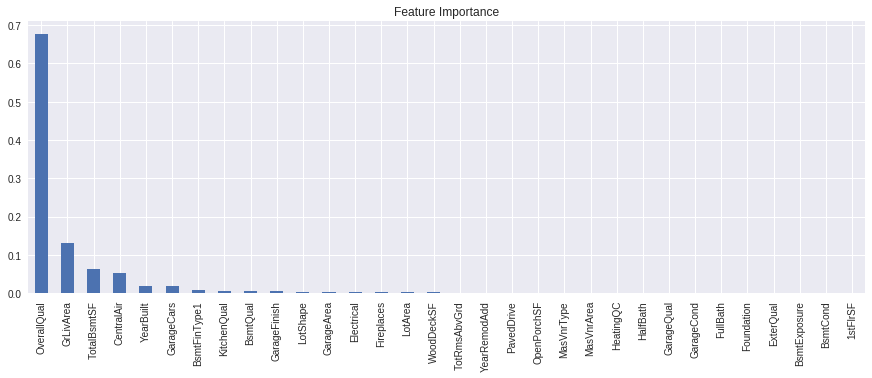

In [0]:
best_score = 0

for m in range(1,11):
    TreeModel=DecisionTreeRegressor(max_depth = m)
    scores = cross_val_score(TreeModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = m
    
print("Best Max_Depth Parameter: " + str(best_parameters))
run_model(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))
plot_fi(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))

##### With Feature Scaling

Best Max_Depth Parameter: 5
Test Score of Training Set: 0.8162958327058584
Test RMSE of Training Set: 0.1807103931799521
Train RMSE of Training Set: 0.15780720430600714
Difference: -0.022903188873944963


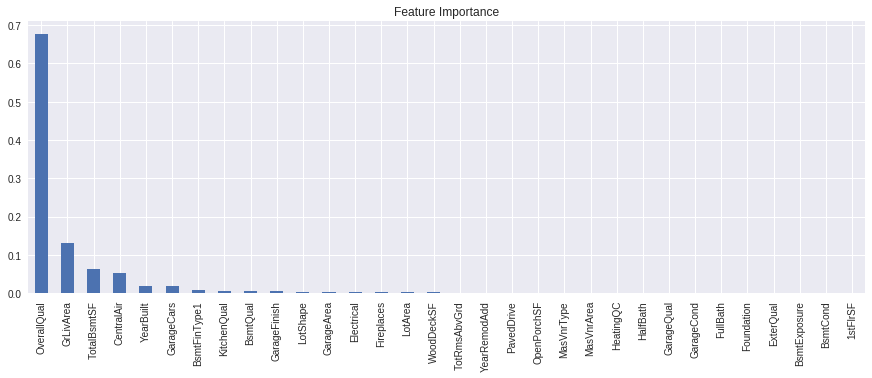

In [0]:
best_score = 0

for m in range (1,11):
    TreeModel=DecisionTreeRegressor(max_depth=m)
    scores = cross_val_score(TreeModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = m
    
print("Best Max_Depth Parameter: " + str(best_parameters))
run_model_fs(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))
plot_fi_fs(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))

#### Random Forest

Best Max_Depth Parameter: 10
Best N_Estimators Parameter: 8
Best Max_Features Parameter: 8
Test Score of Training Set: 0.8961225527422311
Test RMSE of Training Set: 0.13588898692369436
Train RMSE of Training Set: 0.08292420775807913
Difference: -0.05296477916561523


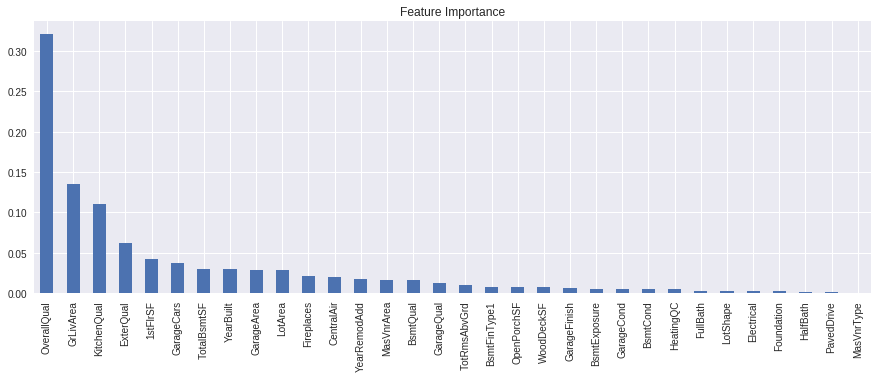

In [0]:
best_score = 0

for f in range (1,11):
    for n in range (1,11):
        for m in range(1,11):
            RFModel=RandomForestRegressor(n_estimators = n, max_features = f, max_depth = m)
            scores = cross_val_score(RFModel, X_trainval, Y_trainval, cv=kfolds)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters_m = m
                best_parameters_n = n
                best_parameters_f = f
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
print("Best Max_Features Parameter: " + str(best_parameters_f))
run_model(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))
plot_fi(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))

##### With Feature Scaling

Best Max_Depth Parameter: 9
Best N_Estimators Parameter: 9
Best Max_Features Parameter: 8
Test Score of Training Set: 0.8830760744005082
Test RMSE of Training Set: 0.14417014014414772
Train RMSE of Training Set: 0.08182671848334443
Difference: -0.0623434216608033


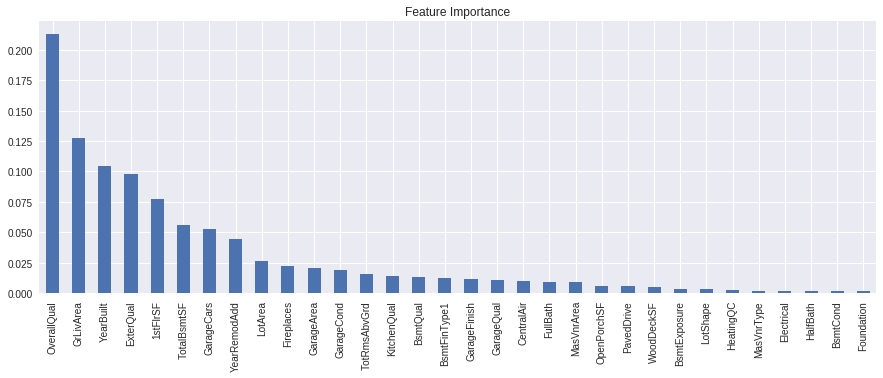

In [0]:
best_score = 0

for f in range (1,11):
    for n in range (1,11):
        for m in range(1,11):
            RFModel=RandomForestRegressor(n_estimators = n, max_features = f, max_depth = m)
            scores = cross_val_score(RFModel, X_trainval_transformed, Y_trainval, cv=kfolds)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters_m = m
                best_parameters_n = n
                best_parameters_f = f
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
print("Best Max_Features Parameter: " + str(best_parameters_f))
run_model_fs(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))
plot_fi_fs(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))

#### AdaBoost

Best Max_Depth Parameter: 5
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.8900080508311092
Test RMSE of Training Set: 0.1398311971361468
Train RMSE of Training Set: 0.09649906429109671
Difference: -0.043332132845050095


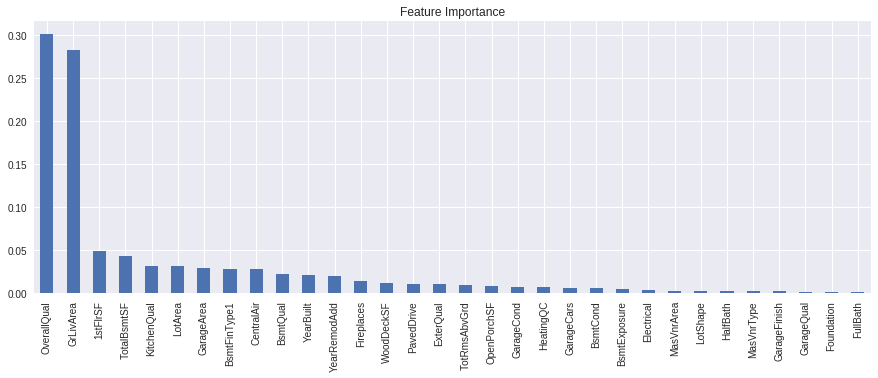

In [0]:
best_score = 0

for n in (50,100,200,400,800,1600):
    for m in range(1,6):
        ABModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = m), n_estimators = n) 
        scores = cross_val_score(ABModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))
plot_fi(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))

##### With Feature Scaling

Best Max_Depth Parameter: 5
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.8887588386057166
Test RMSE of Training Set: 0.1406230081214779
Train RMSE of Training Set: 0.09624080967181838
Difference: -0.04438219844965953


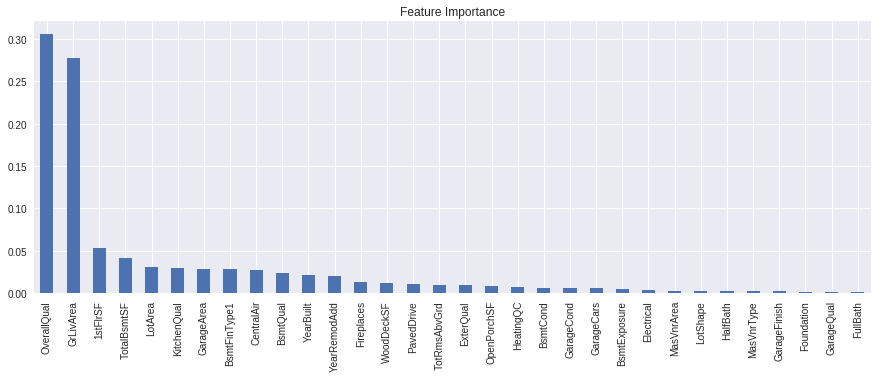

In [0]:
best_score = 0

for n in (50,100,200,400,800,1600):
    for m in range(1,6):
        ABModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = m), n_estimators = n) 
        scores = cross_val_score(ABModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model_fs(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))
plot_fi_fs(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))

#### Gradient Boost

Best Max_Depth Parameter: 3
Best N_Estimators Parameter: 100
Test Score of Training Set: 0.9120603144169078
Test RMSE of Training Set: 0.1250305325291697
Train RMSE of Training Set: 0.09190337524124423
Difference: -0.03312715728792548


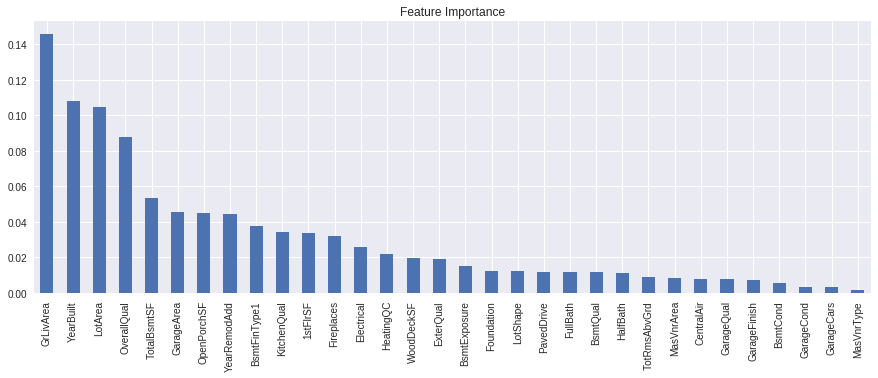

In [0]:
best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        GBModel=GradientBoostingRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(GBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

##### With Feature Scaling

Best Max_Depth Parameter: 3
Best N_Estimators Parameter: 100
Test Score of Training Set: 0.9115342573179546
Test RMSE of Training Set: 0.12540394259838739
Train RMSE of Training Set: 0.09190337524124423
Difference: -0.03350056735714316


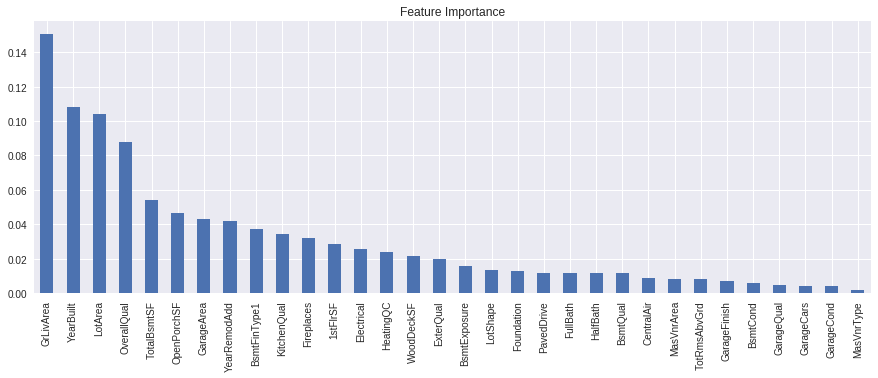

In [0]:
best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        GBModel=GradientBoostingRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(GBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model_fs(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi_fs(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

#### Support Vector Regression

In [0]:
best_score = 0

for c in (.01,.1,1,10,100):
    svmModel=LinearSVR(C = c) 
    scores = cross_val_score(svmModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters_c = c
    
print("Best C Parameter: " + str(best_parameters_c))
run_model(LinearSVR(C=best_parameters_c))

Best C Parameter: 1
Test Score of Training Set: 0.7710963379113596
Test RMSE of Training Set: 0.2017204819179363
Train RMSE of Training Set: 0.21225032491551188
Difference: 0.01052984299757559


##### With Feature Scaling

In [0]:
best_score = 0

for c in (.01,.1,1,10,100):
    svmModel=LinearSVR(C = c) 
    scores = cross_val_score(svmModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters_c = c
    
print("Best C Parameter: " + str(best_parameters_c))
run_model_fs(LinearSVR(C=best_parameters_c))

Best C Parameter: 0.01
Test Score of Training Set: -6.427208527835564
Test RMSE of Training Set: 1.1490434075124787
Train RMSE of Training Set: 1.1360092844482816
Difference: -0.013034123064197045


#### XGBoost

Best Max_Depth Parameter: 2
Best N_Estimators Parameter: 400
Test Score of Training Set: 0.9137416543118357
Test RMSE of Training Set: 0.12382951987531174
Train RMSE of Training Set: 0.09106626606125992
Difference: -0.03276325381405182


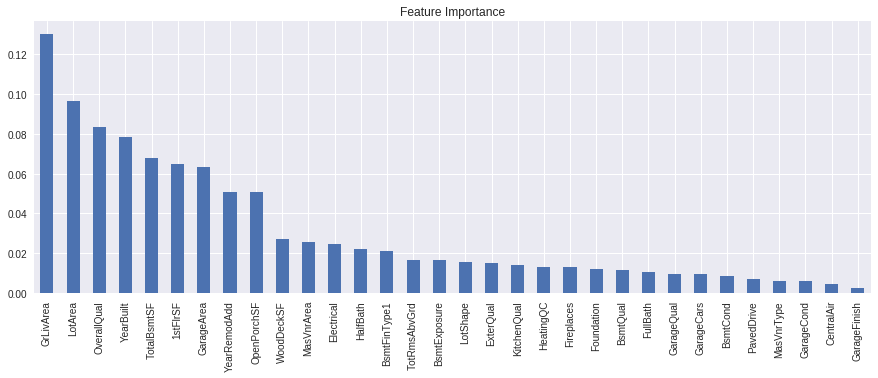

In [0]:
#!pip install xgboost

from xgboost import XGBRegressor

best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        XGBModel=XGBRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(XGBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

##### With Feature Scaling

Best Max_Depth Parameter: 2
Best N_Estimators Parameter: 400
Test Score of Training Set: 0.9137416543118357
Test RMSE of Training Set: 0.12382951987531174
Train RMSE of Training Set: 0.09106626606125992
Difference: -0.03276325381405182


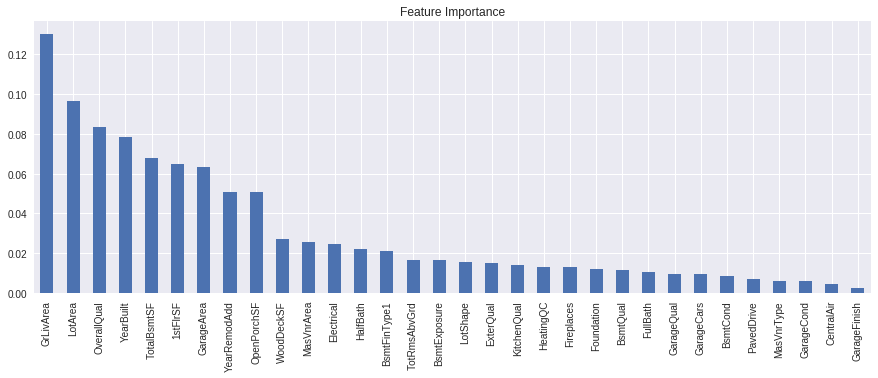

In [0]:
from xgboost import XGBRegressor

best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        XGBModel=XGBRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(XGBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model_fs(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi_fs(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

#### Neural Network

##### scikit-learn Neural Network

In [0]:
from sklearn.neural_network import MLPRegressor

#best_score = 0

#for a in (.00001,.0001,.001,.01,.1,1):
    #for m in (200.400,800,1600):
        #MLPModel=MLPRegressor(activation = 'identity', alpha = a) 
        #scores = cross_val_score(MLPModel, X_trainval, Y_trainval, cv=kfolds)
        #score = np.mean(scores)
        #if score > best_score:
            #best_score = score
            #best_parameters_a = a
    
#print("Best Activation Function Parameter: " + str(best_parameters_ac))
#print("Best Alpha Parameter: " + str(best_parameters_a))
#print("Best Max Iterations Parameter: " + str(best_parameters_m))

#run_model_fs(MLPRegressor(activation = best_parameters_ac, alpha = best_parameters_a, max_iter = best_parameters_m))

run_model(MLPRegressor(activation = 'identity', alpha = .1, hidden_layer_sizes=(64,64), max_iter = 1000))

Test Score of Training Set: -10.989317152019002
Test RMSE of Training Set: 1.459892411137455
Train RMSE of Training Set: 1.5005933461481844
Difference: 0.040700935010729467


###### With Feature Scaling

In [0]:
run_model_fs(MLPRegressor(activation = 'identity', alpha = .1, hidden_layer_sizes=(64,64), max_iter = 1000))

Test Score of Training Set: 0.8853333666858925
Test RMSE of Training Set: 0.14277170877199458
Train RMSE of Training Set: 0.14432853174343677
Difference: 0.00155682297144219


#####Tensorflow Neural Network

###### Building Model

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.keras.activations.linear,kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(X_trainval_transformed.shape[1],)),
    keras.layers.Dense(64, activation=tf.keras.activations.linear, kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


###### Training Model

In [0]:
EPOCHS = 1000

history = model.fit(X_trainval_transformed, Y_trainval, epochs=EPOCHS,
                    validation_split=0.25, verbose=0)

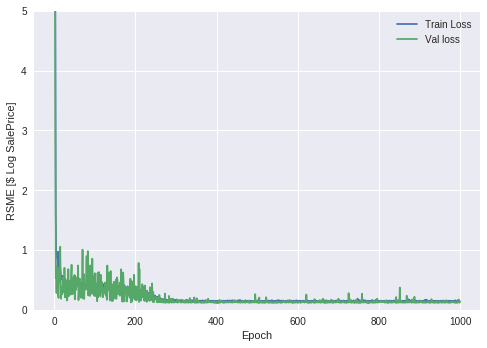

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('RSME [$ Log SalePrice]')
  plt.plot(history.epoch, np.array(np.sqrt(history.history['mean_squared_error'])),
           label='Train Loss')
  plt.plot(history.epoch, np.array(np.sqrt(history.history['val_mean_squared_error'])),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)

###### Stopping Parameter

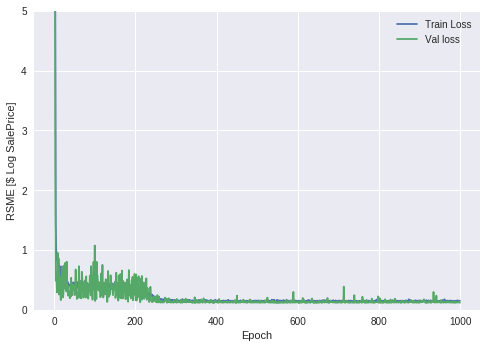

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

history = model.fit(X_trainval_transformed, Y_trainval, epochs=EPOCHS,
                    validation_split=0.25, verbose=0,
                    callbacks=[early_stop])

plot_history(history)

###### Evaluation

In [0]:
[loss, mse] = model.evaluate(X_test_transformed, Y_test, verbose=0)

print("Testing Set RSME: " + str(np.sqrt(mse)))

Testing Set RSME: 0.1282236380843412


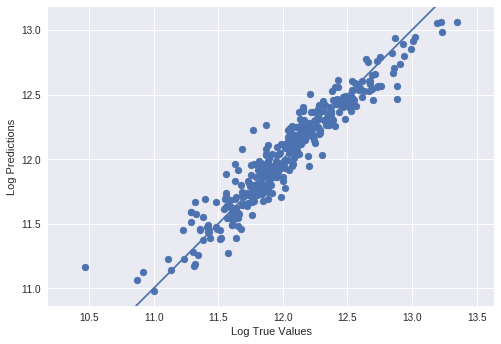

In [0]:
test_predictions = model.predict(X_test_transformed).flatten()

plt.scatter(Y_test, test_predictions)
plt.xlabel('Log True Values')
plt.ylabel('Log Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

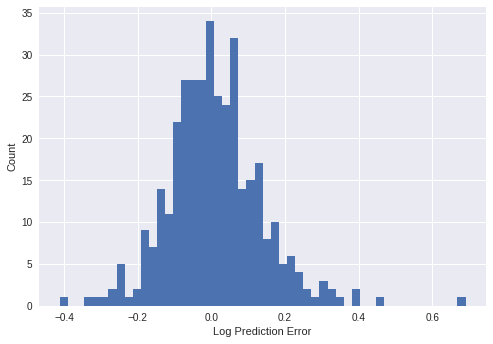

In [0]:
error = test_predictions - Y_test
plt.hist(error, bins = 50)
plt.xlabel("Log Prediction Error")
_ = plt.ylabel("Count")

### With Engineered Features

In [0]:
ames_train_new=transform_features(ames_train)

X=ames_train_new.loc[:, ames_train_new.columns != 'SalePrice']
X=X.loc[:, X.columns != 'Id']
Y=ames_train_new.SalePrice
 
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state= 0)

scaler=preprocessing.StandardScaler().fit(X_trainval) #define scaler depending onthe features in training data
X_trainval_transformed=scaler.transform(X_trainval) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

#### Linear Regression

In [0]:
run_model(LinearRegression())

Test Score of Training Set: 0.927638236520537
Test RMSE of Training Set: 0.11341701102558262
Train RMSE of Training Set: 0.11665600491479601
Difference: 0.003238993889213393


##### With Feature Scaling

In [0]:
run_model_fs(LinearRegression())

Test Score of Training Set: 0.9276382365205394
Test RMSE of Training Set: 0.11341701102558069
Train RMSE of Training Set: 0.11665600491479601
Difference: 0.003238993889215322


#### KNN Regression

In [0]:
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
run_model(neighbors.KNeighborsRegressor(n_neighbors=best_parameters))

Best K Parameter: 8
Test Score of Training Set: 0.6789732206694832
Test RMSE of Training Set: 0.23888795767958615
Train RMSE of Training Set: 0.21089451553667843
Difference: -0.02799344214290772


##### With Feature Scaling

In [0]:
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
run_model_fs(neighbors.KNeighborsRegressor(n_neighbors=best_parameters))

Best K Parameter: 10
Test Score of Training Set: 0.8198068922088142
Test RMSE of Training Set: 0.1789751415116012
Train RMSE of Training Set: 0.16020216593216807
Difference: -0.018772975579433138


##### With PCA

In [0]:
best_score = 0

for n in range (1,100):
    KNNRegression = neighbors.KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(KNNRegression, X_train_pca, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
            best_score = score
            best_parameters = n

print("Best K Parameter: " + str(best_parameters))
run_model_pca(neighbors.KNeighborsRegressor(n_neighbors=best_parameters))

Best K Parameter: 13
Test Score of Training Set: 0.84550340602184
Test RMSE of Training Set: 0.16572311252065752
Train RMSE of Training Set: 0.15518770469830137
Difference: -0.010535407822356152


#### Ridge Regression

In [0]:
best_score = 0

for a in (.001,.01,.1,1,10,100,1000):
    RidgeModel=Ridge(alpha=a)
    scores = cross_val_score(RidgeModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = a
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model(Ridge(alpha=best_parameters))

Best Alpha Parameter: 1
Test Score of Training Set: 0.9281317972502449
Test RMSE of Training Set: 0.11302955527477913
Train RMSE of Training Set: 0.11679713924462909
Difference: 0.0037675839698499552


##### With Feature Scaling

In [0]:
best_score = 0

for a in (.001,.01,.1,1,10,100,1000):
    RidgeModel=Ridge(alpha=a)
    scores = cross_val_score(RidgeModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = a
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model_fs(Ridge(alpha=best_parameters))

Best Alpha Parameter: 100
Test Score of Training Set: 0.9256429553421834
Test RMSE of Training Set: 0.11497004115077282
Train RMSE of Training Set: 0.11811266073516631
Difference: 0.003142619584393491


#### Lasso Regression

In [0]:
best_score = 0

for alpha in (.001,.01,.1,1,10,100,1000):
    LassoModel=Lasso(alpha=alpha)
    scores = cross_val_score(LassoModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = alpha
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model(Lasso(alpha=best_parameters))

Best Alpha Parameter: 0.001
Test Score of Training Set: 0.9310220736567127
Test RMSE of Training Set: 0.11073341501880406
Train RMSE of Training Set: 0.12007182108071791
Difference: 0.009338406061913856


##### With Feature Scaling

In [0]:
best_score = 0

for alpha in (.001,.01,.1,1,10,100,1000):
    LassoModel=Lasso(alpha=alpha)
    scores = cross_val_score(LassoModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = alpha
    
print("Best Alpha Parameter: " + str(best_parameters))
run_model_fs(Lasso(alpha=best_parameters))

Best Alpha Parameter: 0.001
Test Score of Training Set: 0.9292641597072839
Test RMSE of Training Set: 0.11213556746958207
Train RMSE of Training Set: 0.11713700926630156
Difference: 0.005001441796719491


#### Decision Trees

Best Max_Depth Parameter: 7
Test Score of Training Set: 0.8285170665962261
Test RMSE of Training Set: 0.17459591512289452
Train RMSE of Training Set: 0.1046579093093214
Difference: -0.06993800581357312


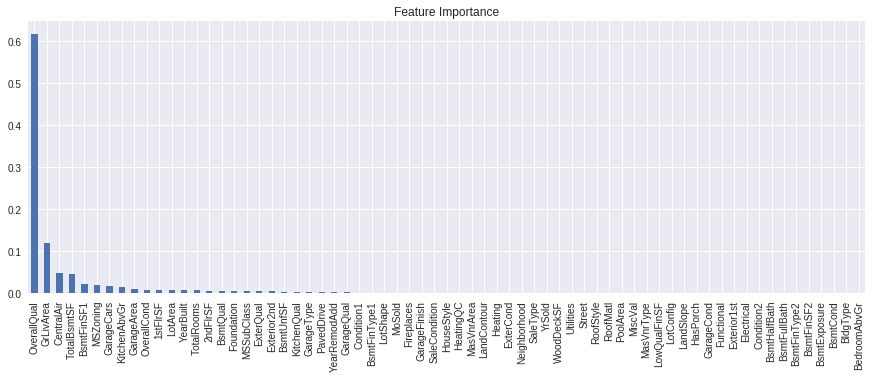

In [0]:
best_score = 0

for m in range(1,11):
    TreeModel=DecisionTreeRegressor(max_depth = m)
    scores = cross_val_score(TreeModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = m
    
print("Best Max_Depth Parameter: " + str(best_parameters))
run_model(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))
plot_fi(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))

##### With Feature Scaling

Best Max_Depth Parameter: 7
Test Score of Training Set: 0.8285170665962261
Test RMSE of Training Set: 0.17459591512289452
Train RMSE of Training Set: 0.1046579093093214
Difference: -0.06993800581357312


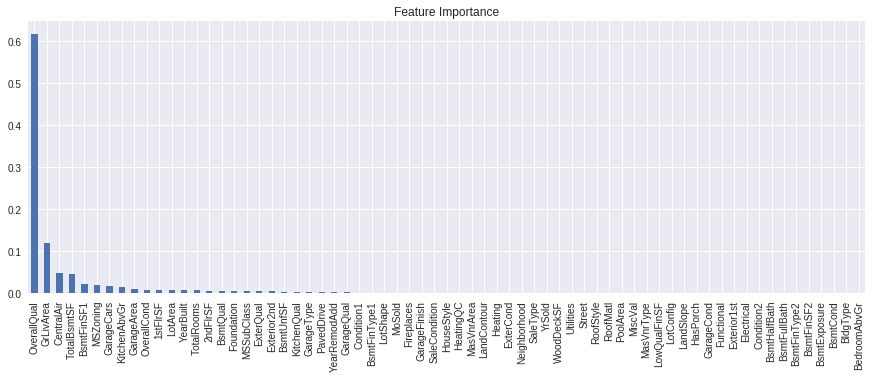

In [0]:
best_score = 0

for m in range (1,11):
    TreeModel=DecisionTreeRegressor(max_depth=m)
    scores = cross_val_score(TreeModel, X_trainval_transformed, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = m
    
print("Best Max_Depth Parameter: " + str(best_parameters))
run_model_fs(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))
plot_fi_fs(DecisionTreeRegressor(max_depth=best_parameters, random_state=0))

#### Random Forest

Best Max_Depth Parameter: 10
Best N_Estimators Parameter: 10
Best Max_Features Parameter: 10
Test Score of Training Set: 0.8904194135281505
Test RMSE of Training Set: 0.13956947243203963
Train RMSE of Training Set: 0.07863117188685913
Difference: -0.0609383005451805


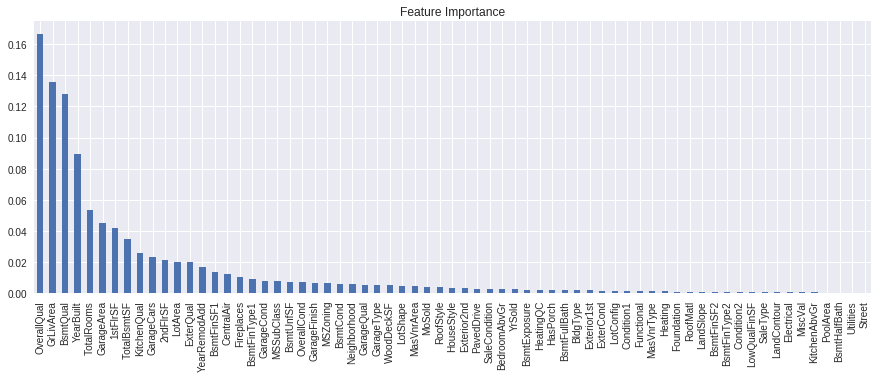

In [0]:
best_score = 0

for f in range (1,11):
    for n in range (1,11):
        for m in range(1,11):
            RFModel=RandomForestRegressor(n_estimators = n, max_features = f, max_depth = m)
            scores = cross_val_score(RFModel, X_trainval, Y_trainval, cv=kfolds)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters_m = m
                best_parameters_n = n
                best_parameters_f = f
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
print("Best Max_Features Parameter: " + str(best_parameters_f))
run_model(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))
plot_fi(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))

##### With Feature Scaling

Best Max_Depth Parameter: 10
Best N_Estimators Parameter: 9
Best Max_Features Parameter: 10
Test Score of Training Set: 0.8917128880540393
Test RMSE of Training Set: 0.1387432975262489
Train RMSE of Training Set: 0.07990267788359655
Difference: -0.058840619642652345


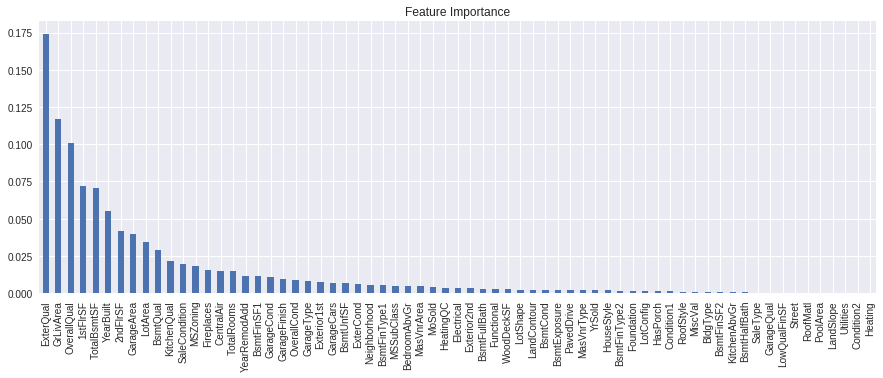

In [0]:
best_score = 0

for f in range (1,11):
    for n in range (1,11):
        for m in range(1,11):
            RFModel=RandomForestRegressor(n_estimators = n, max_features = f, max_depth = m)
            scores = cross_val_score(RFModel, X_trainval_transformed, Y_trainval, cv=kfolds)
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameters_m = m
                best_parameters_n = n
                best_parameters_f = f
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
print("Best Max_Features Parameter: " + str(best_parameters_f))
run_model_fs(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))
plot_fi_fs(RandomForestRegressor(n_estimators = best_parameters_n, max_depth=best_parameters_m, max_features = best_parameters_f))

#### AdaBoost

Best Max_Depth Parameter: 5
Best N_Estimators Parameter: 800
Test Score of Training Set: 0.9020992643869021
Test RMSE of Training Set: 0.1319218108754831
Train RMSE of Training Set: 0.08803421899563142
Difference: -0.04388759187985168


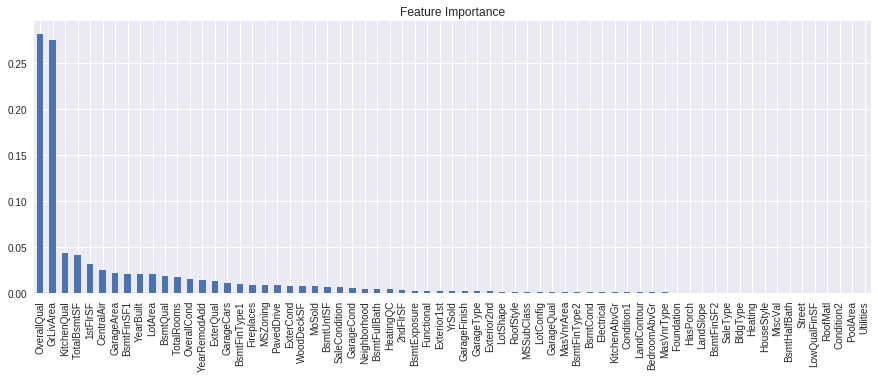

In [0]:
best_score = 0

for n in (50,100,200,400,800,1600):
    for m in range(1,6):
        ABModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = m), n_estimators = n) 
        scores = cross_val_score(ABModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))
plot_fi(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))

##### With Feature Scaling

Best Max_Depth Parameter: 5
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.9035378769090094
Test RMSE of Training Set: 0.13094895434133558
Train RMSE of Training Set: 0.08732622873693399
Difference: -0.043622725604401585


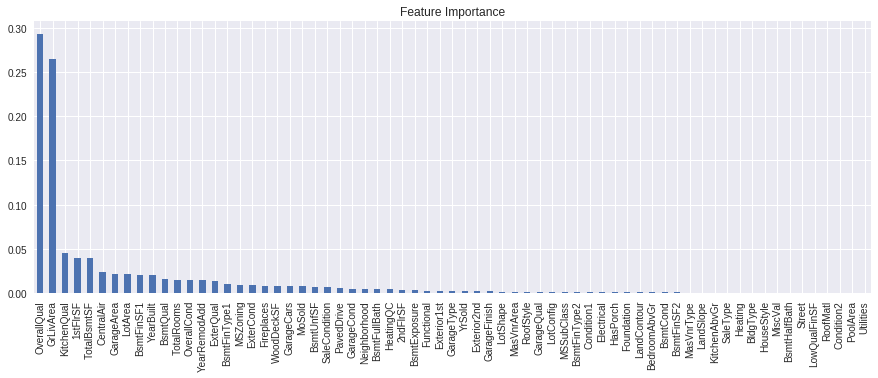

In [0]:
best_score = 0

for n in (50,100,200,400,800,1600):
    for m in range(1,6):
        ABModel=AdaBoostRegressor(DecisionTreeRegressor(max_depth = m), n_estimators = n) 
        scores = cross_val_score(ABModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model_fs(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))
plot_fi_fs(AdaBoostRegressor(DecisionTreeRegressor(max_depth = best_parameters_m), n_estimators = best_parameters_n))

#### Gradient Boost

Best Max_Depth Parameter: 1
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.9290932681215356
Test RMSE of Training Set: 0.11227094060417278
Train RMSE of Training Set: 0.0899225881228513
Difference: -0.022348352481321485


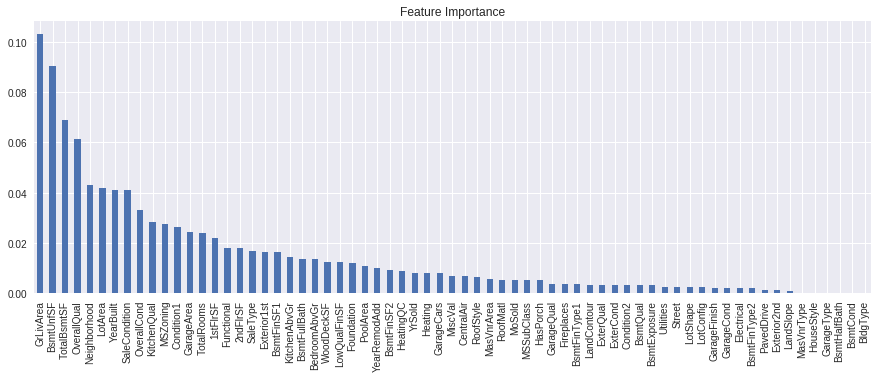

In [0]:
best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        GBModel=GradientBoostingRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(GBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

##### With Feature Scaling

Best Max_Depth Parameter: 1
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.9291061545527057
Test RMSE of Training Set: 0.1122607382055471
Train RMSE of Training Set: 0.0899225881228513
Difference: -0.02233815008269581


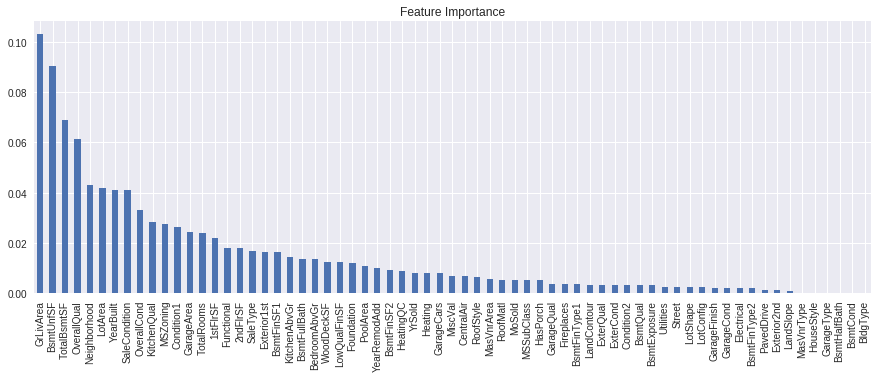

In [0]:
best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        GBModel=GradientBoostingRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(GBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model_fs(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi_fs(GradientBoostingRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

#### Support Vector Regression

In [0]:
best_score = 0

for c in (.01,.1,1,10,100):
    svmModel=LinearSVR(C = c) 
    scores = cross_val_score(svmModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters_c = c
    
print("Best C Parameter: " + str(best_parameters_c))
run_model(LinearSVR(C=best_parameters_c))

Best C Parameter: 10
Test Score of Training Set: 0.8071191488652252
Test RMSE of Training Set: 0.18516895838103561
Train RMSE of Training Set: 0.20124328276916983
Difference: 0.01607432438813422


##### With Feature Scaling

In [0]:
best_score = 0

for c in (.01,.1,1,10,100):
    svmModel=LinearSVR(C = c) 
    scores = cross_val_score(svmModel, X_trainval, Y_trainval, cv=kfolds)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters_c = c
    
print("Best C Parameter: " + str(best_parameters_c))
run_model_fs(LinearSVR(C=best_parameters_c))

Best C Parameter: 1
Test Score of Training Set: 0.9216980725838151
Test RMSE of Training Set: 0.11798039690665857
Train RMSE of Training Set: 0.1283562188689253
Difference: 0.010375821962266718


#### XGBoost

Best Max_Depth Parameter: 1
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.930409839924965
Test RMSE of Training Set: 0.1112237527719923
Train RMSE of Training Set: 0.09082681496202313
Difference: -0.020396937809969165


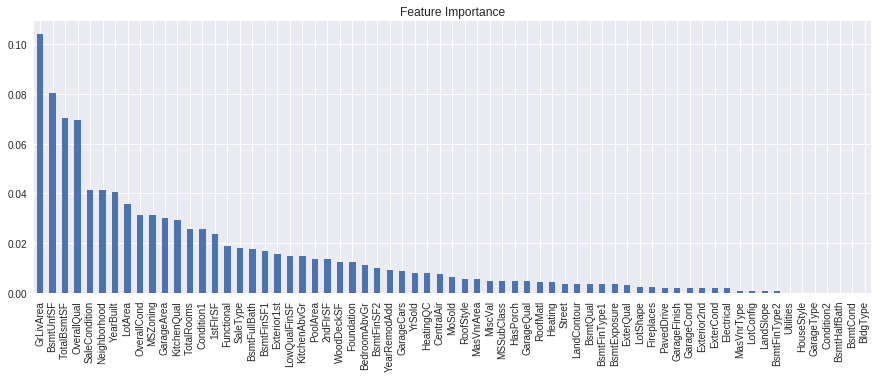

In [0]:
#!pip install xgboost

from xgboost import XGBRegressor

best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        XGBModel=XGBRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(XGBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

##### With Feature Scaling

Best Max_Depth Parameter: 1
Best N_Estimators Parameter: 1600
Test Score of Training Set: 0.930409839924965
Test RMSE of Training Set: 0.1112237527719923
Train RMSE of Training Set: 0.09082681496202313
Difference: -0.020396937809969165


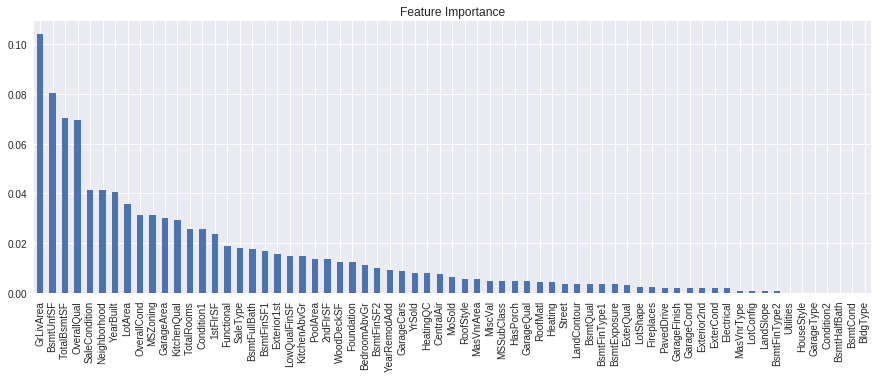

In [0]:
from xgboost import XGBRegressor

best_score = 0

for n in (100,200,400,800,1600):
    for m in range(1,6):
        XGBModel=XGBRegressor(max_depth = m, n_estimators = n) 
        scores = cross_val_score(XGBModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters_m = m
            best_parameters_n = n
    
print("Best Max_Depth Parameter: " + str(best_parameters_m))
print("Best N_Estimators Parameter: " + str(best_parameters_n))
run_model_fs(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))
plot_fi_fs(XGBRegressor(max_depth = best_parameters_m, n_estimators = best_parameters_n))

#### Neural Network

##### scikit-learn Neural Network

In [0]:
from sklearn.neural_network import MLPRegressor

#best_score = 0

#for a in (.00001,.0001,.001,.01,.1,1):
    #for m in (200.400,800,1600):
        #MLPModel=MLPRegressor(activation = 'identity', alpha = a) 
        #scores = cross_val_score(MLPModel, X_trainval, Y_trainval, cv=kfolds)
        #score = np.mean(scores)
        #if score > best_score:
            #best_score = score
            #best_parameters_a = a
    
#print("Best Activation Function Parameter: " + str(best_parameters_ac))
#print("Best Alpha Parameter: " + str(best_parameters_a))
#print("Best Max Iterations Parameter: " + str(best_parameters_m))

#run_model_fs(MLPRegressor(activation = best_parameters_ac, alpha = best_parameters_a, max_iter = best_parameters_m))

run_model(MLPRegressor(activation = 'identity', alpha = .1, hidden_layer_sizes=(64,64), max_iter = 1000))

Test Score of Training Set: -29.943681842614993
Test RMSE of Training Set: 2.3453605735243754
Train RMSE of Training Set: 2.5425652661727987
Difference: 0.19720469264842322


###### With Feature Scaling

In [0]:
run_model_fs(MLPRegressor(activation = 'identity', alpha = .1, hidden_layer_sizes=(64,64), max_iter = 1000))

Test Score of Training Set: 0.9091972432711954
Test RMSE of Training Set: 0.1270495536164706
Train RMSE of Training Set: 0.13028691553598792
Difference: 0.0032373619195173176


#####Tensorflow Neural Network

###### Building Model

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.keras.activations.linear,kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(X_trainval_transformed.shape[1],)),
    keras.layers.Dense(64, activation=tf.keras.activations.linear, kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               8704      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 65        
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


###### Training Model

In [0]:
EPOCHS = 1000

history = model.fit(X_trainval_transformed, Y_trainval, epochs=EPOCHS,
                    validation_split=0.25, verbose=0)

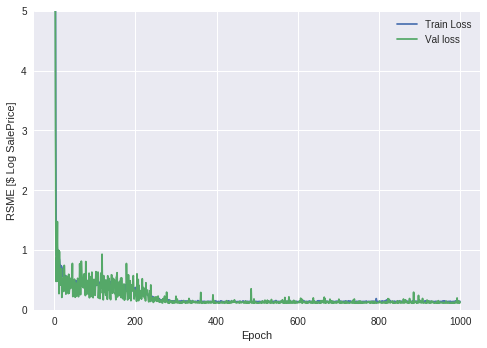

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('RSME [$ Log SalePrice]')
  plt.plot(history.epoch, np.array(np.sqrt(history.history['mean_squared_error'])),
           label='Train Loss')
  plt.plot(history.epoch, np.array(np.sqrt(history.history['val_mean_squared_error'])),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)

###### Stopping Parameter

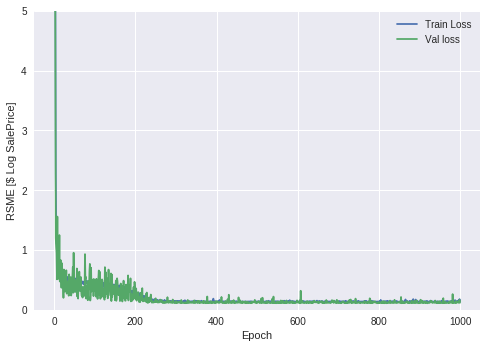

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

history = model.fit(X_trainval_transformed, Y_trainval, epochs=EPOCHS,
                    validation_split=0.25, verbose=0,
                    callbacks=[early_stop])

plot_history(history)

###### Evaluation

In [0]:
[loss, mse] = model.evaluate(X_test_transformed, Y_test, verbose=0)

print("Testing Set RSME: " + str(np.sqrt(mse)))

Testing Set RSME: 0.1233084674188588


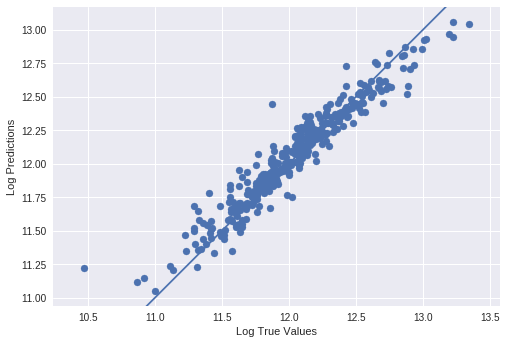

In [0]:
test_predictions = model.predict(X_test_transformed).flatten()

plt.scatter(Y_test, test_predictions)
plt.xlabel('Log True Values')
plt.ylabel('Log Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

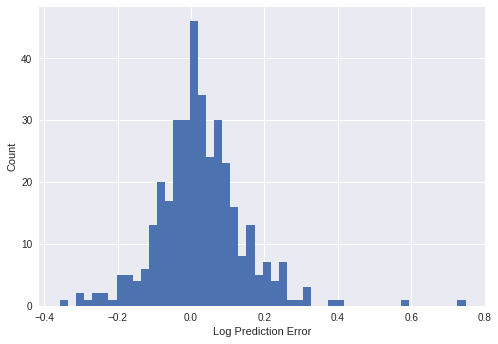

In [0]:
error = test_predictions - Y_test
plt.hist(error, bins = 50)
plt.xlabel("Log Prediction Error")
_ = plt.ylabel("Count")

###### Prediction

In [0]:
scaler=preprocessing.StandardScaler().fit(test)
test=scaler.transform(test)

y_pred = model.predict(test)
y_pred = np.exp(y_pred)

output = pd.DataFrame()
output['Id'] = ames_test['Id']
output['SalePrice'] = y_pred
output.to_csv('gdrive/My Drive/Machine Learning Project/output_tf.csv', index=False)

## Best Model (Gradient Boost - All Features)

<img src="score.png">